# <font color=blus>Table of contents</font>

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="CNN Classifier")

# <font color=blus>Abstract</font>

In this notebook, CNN estimator i built for binary classification model.


<pre>
<li>NN model are non-linear models, then it is supposed to capture non-linear relations in between features </li>
<li>CNN model provides results while extracting syntaxic and semantic structures from text.</li>
</pre>

Multiple dataset are used in order to benchmark assumptions forged about model.

Data used for feeding model are read from mass storage.

Transformations that may occure over data are used only for the purpose of this notebooK.

# <font color=blus>Sotfawe engineering</font>

<img src="./img/SoftwareEngineeringCNNClassifier.png">

# <font color=blus>0. Notebook configuration</font>

In [2]:
%matplotlib inline


%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')


# <font color=blus>1. Load DataGenerator objects</font>

In [3]:
import p5_util

filename_train = './data/train_generator.dill'
filename_valid = './data/valid_generator.dill'
if True :
    train_generator = p5_util.object_load(filename_train)
    valid_generator = p5_util.object_load(filename_valid)
else :
    p5_util.object_dump(train_generator, filename_train, is_verbose=True)
    p5_util.object_dump(valid_generator, filename_valid, is_verbose=True)
    

p5_util.object_load : fileName= ./data/train_generator.dill


Using TensorFlow backend.
W1014 23:33:52.825596 140077312374592 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1014 23:33:52.826644 140077312374592 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W1014 23:33:52.856286 140077312374592 deprecation_wrapper.py:119] From /home/bangui/Dropbox/Perso/Formation/openclassrooms/OC_Datascientist/Kaggle/p8_util_config.py:137: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



p5_util.object_load : fileName= ./data/valid_generator.dill


# <font color=blus>2. CNN Hyper-parameters selection </font>

In [5]:
import p9_util_config

#---------------------------------------------------------------
# Update of generic paramaters depending of DataGenerator 
#---------------------------------------------------------------
dict_param_keras_cnn = p9_util_config.dict_param_keras_cnn.copy()
if False :
    dict_param_keras_cnn['nb_dense_neuron'] = 8
    dict_param_keras_cnn['dense_layer'] = 2

    dict_param_keras_cnn['conv_layer'] = 1

dict_param_keras = dict_param_keras_cnn['dict_param_keras'].copy()
dict_param_keras['input_dim']          = train_generator.get_params()['keras_input_dim']
dict_param_keras['batch_size']         = train_generator.get_params()['batch_size']
dict_param_keras['nbClasses']         = train_generator.get_params()['n_classes']
#dict_param_keras['dropout_rate']      = 0.
#dict_param_keras['lr'] = 0.1

dict_param_keras_cnn['dict_param_keras'] = dict_param_keras.copy()
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (105, 300),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.3,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [8]:
import p9_util_keras

dict_hyperparam = {'filter_size' : [2,3,4,5,6,7]}

dict_list_val_mae = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : filter_size / value= 2
Epoch 1/10
87/87 [==============================] - 19s 218ms/step - loss: 0.6435 - binary_accuracy: 0.6674 - val_loss: 0.5559 - val_binary_accuracy: 0.7326
Epoch 2/10
87/87 [==============================] - 15s 170ms/step - loss: 0.5372 - binary_accuracy: 0.7345 - val_loss: 0.5249 - val_binary_accuracy: 0.7500
Epoch 3/10
87/87 [==============================] - 16s 188ms/step - loss: 0.5176 - binary_accuracy: 0.7492 - val_loss: 0.5143 - val_binary_accuracy: 0.7663
Epoch 4/10
87/87 [==============================] - 25s 292ms/step - loss: 0.5038 - binary_accuracy: 0.7600 - val_loss: 0.5062 - val_binary_accuracy: 0.7721
Epoch 5/10
87/87 [==============================] - 25s 287ms/step - loss: 0.4952 - binary_accuracy: 0.7643 - val_loss: 0.4985 - val_binary_accuracy: 0.7779
Epoch 6/10
87/87 [==============================] - 24s 274ms/step - loss: 0.4903 - binary_accuracy: 0.7679 - val_loss: 0.4957 - val_binary_accuracy: 0.7756
Epoch 7/10
87/87 [====

Epoch 2/10
87/87 [==============================] - 15s 167ms/step - loss: 0.5141 - binary_accuracy: 0.7528 - val_loss: 0.5267 - val_binary_accuracy: 0.7523
Epoch 3/10
87/87 [==============================] - 15s 169ms/step - loss: 0.4946 - binary_accuracy: 0.7628 - val_loss: 0.5280 - val_binary_accuracy: 0.7640
Epoch 4/10
87/87 [==============================] - 15s 170ms/step - loss: 0.4812 - binary_accuracy: 0.7731 - val_loss: 0.5263 - val_binary_accuracy: 0.7674
Epoch 5/10
87/87 [==============================] - 15s 174ms/step - loss: 0.4652 - binary_accuracy: 0.7820 - val_loss: 0.5293 - val_binary_accuracy: 0.7547
Epoch 6/10
87/87 [==============================] - 15s 174ms/step - loss: 0.4488 - binary_accuracy: 0.7910 - val_loss: 0.5337 - val_binary_accuracy: 0.7640
Epoch 7/10
87/87 [==============================] - 15s 173ms/step - loss: 0.4275 - binary_accuracy: 0.8048 - val_loss: 0.5411 - val_binary_accuracy: 0.7547
Epoch 8/10
87/87 [==============================] - 15s 17

In [27]:
def replace_dictkey(dict_val, new_key) :
    dict_new = dict()
    for key, item in dict_val.items():
        value = key.split('_')[-1]
        name =new_key+str(value)
        dict_new[name] = item
    return dict_new

#### Conv filter size

Param=2: 0.770% (+/-0.016)
Param=3: 0.757% (+/-0.011)
Param=4: 0.758% (+/-0.007)
Param=5: 0.752% (+/-0.005)
Param=6: 0.747% (+/-0.005)
Param=7: 0.753% (+/-0.010)


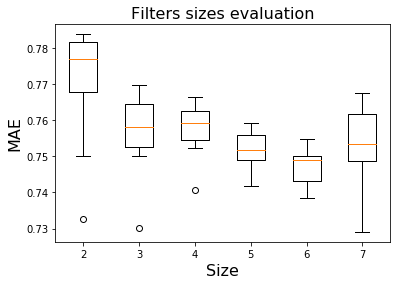

In [33]:
import p9_util_keras
new_key= ''
dict_ = replace_dictkey(dict_list_val_mae, new_key)

title= 'Filters sizes evaluation'
x_label = 'Size'
y_label = 'MAE'
p9_util_keras.display_evaluation(dict_, title=title, x_label=x_label, y_label=y_label)

#### Filters number

In [36]:
dict_param_keras_cnn['filter_size'] = 2
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 162),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.2,
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 2,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 128,
 'conv_layer': 3,
 'nb_dense_neuron': 64,
 'dense_layer': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [37]:
import p9_util_keras

dict_hyperparam = {'nb_filter' : [8,16,32,64,128,256]}

dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : nb_filter / value= 8
Epoch 1/10
87/87 [==============================] - 11s 124ms/step - loss: 0.6984 - binary_accuracy: 0.6357 - val_loss: 0.5939 - val_binary_accuracy: 0.7128
Epoch 2/10
87/87 [==============================] - 6s 71ms/step - loss: 0.6023 - binary_accuracy: 0.6916 - val_loss: 0.5526 - val_binary_accuracy: 0.7314
Epoch 3/10
87/87 [==============================] - 7s 77ms/step - loss: 0.5665 - binary_accuracy: 0.7181 - val_loss: 0.5310 - val_binary_accuracy: 0.7419
Epoch 4/10
87/87 [==============================] - 7s 76ms/step - loss: 0.5435 - binary_accuracy: 0.7339 - val_loss: 0.5215 - val_binary_accuracy: 0.7558
Epoch 5/10
87/87 [==============================] - 7s 85ms/step - loss: 0.5342 - binary_accuracy: 0.7409 - val_loss: 0.5166 - val_binary_accuracy: 0.7512
Epoch 6/10
87/87 [==============================] - 7s 78ms/step - loss: 0.5221 - binary_accuracy: 0.7501 - val_loss: 0.5127 - val_binary_accuracy: 0.7616
Epoch 7/10
87/87 [================

87/87 [==============================] - 36s 412ms/step - loss: 0.5248 - binary_accuracy: 0.7469 - val_loss: 0.5310 - val_binary_accuracy: 0.7465
Epoch 3/10
87/87 [==============================] - 35s 397ms/step - loss: 0.5053 - binary_accuracy: 0.7594 - val_loss: 0.5280 - val_binary_accuracy: 0.7523
Epoch 4/10
87/87 [==============================] - 34s 392ms/step - loss: 0.4930 - binary_accuracy: 0.7671 - val_loss: 0.5227 - val_binary_accuracy: 0.7547
Epoch 5/10
87/87 [==============================] - 35s 400ms/step - loss: 0.4824 - binary_accuracy: 0.7753 - val_loss: 0.5197 - val_binary_accuracy: 0.7651
Epoch 6/10
87/87 [==============================] - 35s 400ms/step - loss: 0.4739 - binary_accuracy: 0.7805 - val_loss: 0.5216 - val_binary_accuracy: 0.7651
Epoch 7/10
87/87 [==============================] - 35s 401ms/step - loss: 0.4649 - binary_accuracy: 0.7845 - val_loss: 0.5220 - val_binary_accuracy: 0.7616
Epoch 8/10
87/87 [==============================] - 35s 406ms/step - 

Param=8: 0.752% (+/-0.017)
Param=16: 0.760% (+/-0.009)
Param=32: 0.758% (+/-0.009)
Param=64: 0.764% (+/-0.012)
Param=128: 0.763% (+/-0.004)
Param=256: 0.754% (+/-0.008)


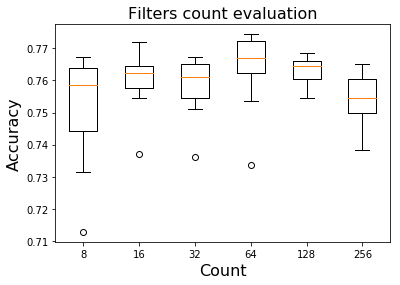

In [39]:
import p9_util_keras
new_key= ''
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'Filters count evaluation'
x_label = 'Count'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

#### Dense neurons count

In [43]:
dict_param_keras_cnn['filter_size'] = 2
dict_param_keras_cnn['nb_filter'] = 64

dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 162),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.2,
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 2,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 64,
 'conv_layer': 3,
 'nb_dense_neuron': 64,
 'dense_layer': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [44]:
import p9_util_keras

dict_hyperparam = {'nb_dense_neuron' : [4,8,16,32,64,128]}

dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : nb_dense_neuron / value= 4
Epoch 1/10
87/87 [==============================] - 15s 168ms/step - loss: 0.6719 - binary_accuracy: 0.6612 - val_loss: 0.5803 - val_binary_accuracy: 0.7314
Epoch 2/10
87/87 [==============================] - 10s 112ms/step - loss: 0.5986 - binary_accuracy: 0.6963 - val_loss: 0.5604 - val_binary_accuracy: 0.7360
Epoch 3/10
87/87 [==============================] - 10s 113ms/step - loss: 0.5637 - binary_accuracy: 0.7212 - val_loss: 0.5438 - val_binary_accuracy: 0.7419
Epoch 4/10
87/87 [==============================] - 10s 111ms/step - loss: 0.5445 - binary_accuracy: 0.7351 - val_loss: 0.5361 - val_binary_accuracy: 0.7407
Epoch 5/10
87/87 [==============================] - 10s 114ms/step - loss: 0.5330 - binary_accuracy: 0.7428 - val_loss: 0.5278 - val_binary_accuracy: 0.7570
Epoch 6/10
87/87 [==============================] - 10s 113ms/step - loss: 0.5260 - binary_accuracy: 0.7493 - val_loss: 0.5236 - val_binary_accuracy: 0.7593
Epoch 7/10
87/87 [

Epoch 2/10
87/87 [==============================] - 7s 86ms/step - loss: 0.5452 - binary_accuracy: 0.7308 - val_loss: 0.5386 - val_binary_accuracy: 0.7453
Epoch 3/10
87/87 [==============================] - 7s 86ms/step - loss: 0.5230 - binary_accuracy: 0.7471 - val_loss: 0.5290 - val_binary_accuracy: 0.7535
Epoch 4/10
87/87 [==============================] - 7s 86ms/step - loss: 0.5114 - binary_accuracy: 0.7561 - val_loss: 0.5229 - val_binary_accuracy: 0.7558
Epoch 5/10
87/87 [==============================] - 7s 85ms/step - loss: 0.5036 - binary_accuracy: 0.7605 - val_loss: 0.5190 - val_binary_accuracy: 0.7651
Epoch 6/10
87/87 [==============================] - 7s 85ms/step - loss: 0.4978 - binary_accuracy: 0.7644 - val_loss: 0.5141 - val_binary_accuracy: 0.7593
Epoch 7/10
87/87 [==============================] - 8s 87ms/step - loss: 0.4922 - binary_accuracy: 0.7686 - val_loss: 0.5111 - val_binary_accuracy: 0.7605
Epoch 8/10
87/87 [==============================] - 7s 84ms/step - los

Param=4: 0.748% (+/-0.010)
Param=8: 0.755% (+/-0.011)
Param=16: 0.759% (+/-0.008)
Param=32: 0.757% (+/-0.010)
Param=64: 0.769% (+/-0.011)
Param=128: 0.756% (+/-0.008)


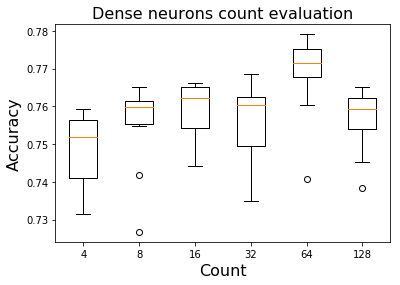

In [45]:
import p9_util_keras
new_key= ''
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'Dense neurons count evaluation'
x_label = 'Count'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

#### Convolutional layers count

In [46]:
dict_param_keras_cnn['filter_size'] = 2
dict_param_keras_cnn['nb_filter'] = 64
dict_param_keras_cnn['nb_dense_neuron']=64
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 162),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.2,
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 2,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 64,
 'conv_layer': 3,
 'nb_dense_neuron': 64,
 'dense_layer': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [47]:
import p9_util_keras

dict_hyperparam = {'conv_layer' : [1,2,3,4,5,]}

dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : conv_layer / value= 1
Epoch 1/10
87/87 [==============================] - 13s 155ms/step - loss: 0.6275 - binary_accuracy: 0.6848 - val_loss: 0.5504 - val_binary_accuracy: 0.7407
Epoch 2/10
87/87 [==============================] - 8s 93ms/step - loss: 0.5281 - binary_accuracy: 0.7409 - val_loss: 0.5443 - val_binary_accuracy: 0.7419
Epoch 3/10
87/87 [==============================] - 9s 105ms/step - loss: 0.5106 - binary_accuracy: 0.7534 - val_loss: 0.5379 - val_binary_accuracy: 0.7453
Epoch 4/10
87/87 [==============================] - 9s 102ms/step - loss: 0.4998 - binary_accuracy: 0.7594 - val_loss: 0.5353 - val_binary_accuracy: 0.7477
Epoch 5/10
87/87 [==============================] - 8s 89ms/step - loss: 0.4894 - binary_accuracy: 0.7688 - val_loss: 0.5318 - val_binary_accuracy: 0.7500
Epoch 6/10
87/87 [==============================] - 6s 72ms/step - loss: 0.4810 - binary_accuracy: 0.7730 - val_loss: 0.5307 - val_binary_accuracy: 0.7512
Epoch 7/10
87/87 [=============

Param=1: 0.746% (+/-0.004)
Param=2: 0.758% (+/-0.016)
Param=3: 0.764% (+/-0.009)
Param=4: 0.752% (+/-0.011)
Param=5: 0.763% (+/-0.015)


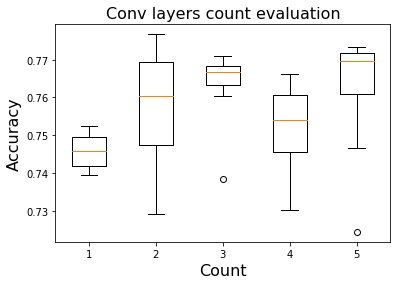

In [49]:
import p9_util_keras
new_key= ''
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'Conv layers count evaluation'
x_label = 'Count'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

#### Dropout rate

In [50]:
dict_param_keras_cnn['filter_size'] = 2
dict_param_keras_cnn['nb_filter'] = 64
dict_param_keras_cnn['nb_dense_neuron']=64
dict_param_keras_cnn['conv_layer']=2
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 162),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.2,
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 2,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 64,
 'conv_layer': 2,
 'nb_dense_neuron': 64,
 'dense_layer': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [51]:
import p9_util_keras

dict_hyperparam = {'dict_param_keras' : {'dropout_rate':[0.0,0.1,0.2,0.3,0.4,0.5]}}

dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : dropout_rate / value= 0.0
Epoch 1/10
87/87 [==============================] - 16s 187ms/step - loss: 0.6393 - binary_accuracy: 0.6792 - val_loss: 0.5474 - val_binary_accuracy: 0.7372
Epoch 2/10
87/87 [==============================] - 10s 115ms/step - loss: 0.5323 - binary_accuracy: 0.7408 - val_loss: 0.5376 - val_binary_accuracy: 0.7477
Epoch 3/10
87/87 [==============================] - 10s 110ms/step - loss: 0.5159 - binary_accuracy: 0.7488 - val_loss: 0.5299 - val_binary_accuracy: 0.7488
Epoch 4/10
87/87 [==============================] - 9s 105ms/step - loss: 0.5056 - binary_accuracy: 0.7570 - val_loss: 0.5305 - val_binary_accuracy: 0.7616
Epoch 5/10
87/87 [==============================] - 9s 105ms/step - loss: 0.4987 - binary_accuracy: 0.7625 - val_loss: 0.5244 - val_binary_accuracy: 0.7674
Epoch 6/10
87/87 [==============================] - 10s 115ms/step - loss: 0.4927 - binary_accuracy: 0.7641 - val_loss: 0.5220 - val_binary_accuracy: 0.7616
Epoch 7/10
87/87 [===

Epoch 2/10
87/87 [==============================] - 11s 125ms/step - loss: 0.5597 - binary_accuracy: 0.7211 - val_loss: 0.5360 - val_binary_accuracy: 0.7465
Epoch 3/10
87/87 [==============================] - 11s 123ms/step - loss: 0.5377 - binary_accuracy: 0.7376 - val_loss: 0.5268 - val_binary_accuracy: 0.7593
Epoch 4/10
87/87 [==============================] - 11s 123ms/step - loss: 0.5233 - binary_accuracy: 0.7473 - val_loss: 0.5218 - val_binary_accuracy: 0.7593
Epoch 5/10
87/87 [==============================] - 11s 123ms/step - loss: 0.5160 - binary_accuracy: 0.7528 - val_loss: 0.5176 - val_binary_accuracy: 0.7640
Epoch 6/10
87/87 [==============================] - 11s 121ms/step - loss: 0.5107 - binary_accuracy: 0.7567 - val_loss: 0.5153 - val_binary_accuracy: 0.7651
Epoch 7/10
87/87 [==============================] - 10s 120ms/step - loss: 0.5044 - binary_accuracy: 0.7605 - val_loss: 0.5097 - val_binary_accuracy: 0.7721
Epoch 8/10
87/87 [==============================] - 10s 11

Param=0.0: 0.758% (+/-0.010)
Param=0.1: 0.738% (+/-0.012)
Param=0.2: 0.749% (+/-0.004)
Param=0.3: 0.748% (+/-0.010)
Param=0.4: 0.758% (+/-0.012)
Param=0.5: 0.760% (+/-0.013)


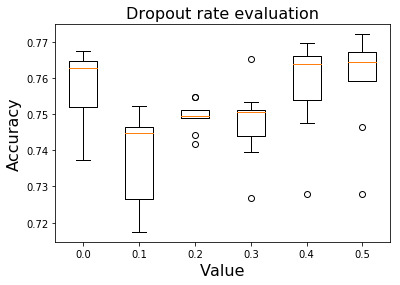

In [53]:
import p9_util_keras
new_key= ''
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'Dropout rate evaluation'
x_label = 'Value'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

#### Learning rate

In [61]:
dict_param_keras_cnn['filter_size'] = 2
dict_param_keras_cnn['nb_filter'] = 64
dict_param_keras_cnn['nb_dense_neuron']=64
dict_param_keras_cnn['conv_layer']=2
dict_param_keras_cnn['dict_param_keras']['dropout_rate']=0.4
dict_param_keras_cnn['dict_param_keras']['nb_epoch']=30

dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 162),
  'batch_size': 500,
  'nb_epoch': 30,
  'verbose': 1,
  'dropout_rate': 0.4,
  'is_batch_normalized': True,
  'lr': 0.005,
  'nbClasses': 2},
 'filter_size': 2,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 64,
 'conv_layer': 2,
 'nb_dense_neuron': 64,
 'dense_layer': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [62]:
import p9_util_keras

dict_hyperparam = {'dict_param_keras' : {'lr':[5.e-3, 1.e-2,2.e-2, 3.e-2,4.e-2, 5.e-2, 1.e-1, 5.e-1]}}

dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : lr / value= 0.005
Epoch 1/30
87/87 [==============================] - 16s 187ms/step - loss: 0.7425 - binary_accuracy: 0.6327 - val_loss: 0.5715 - val_binary_accuracy: 0.7198
Epoch 2/30
87/87 [==============================] - 9s 104ms/step - loss: 0.5934 - binary_accuracy: 0.7009 - val_loss: 0.5531 - val_binary_accuracy: 0.7291
Epoch 3/30
87/87 [==============================] - 9s 105ms/step - loss: 0.5647 - binary_accuracy: 0.7196 - val_loss: 0.5403 - val_binary_accuracy: 0.7395
Epoch 4/30
87/87 [==============================] - 9s 107ms/step - loss: 0.5459 - binary_accuracy: 0.7333 - val_loss: 0.5333 - val_binary_accuracy: 0.7477
Epoch 5/30
87/87 [==============================] - 9s 105ms/step - loss: 0.5382 - binary_accuracy: 0.7370 - val_loss: 0.5301 - val_binary_accuracy: 0.7547
Epoch 6/30
87/87 [==============================] - 9s 106ms/step - loss: 0.5294 - binary_accuracy: 0.7424 - val_loss: 0.5255 - val_binary_accuracy: 0.7570
Epoch 7/30
87/87 [==============

Epoch 23/30
87/87 [==============================] - 8s 93ms/step - loss: 0.4855 - binary_accuracy: 0.7724 - val_loss: 0.4995 - val_binary_accuracy: 0.7581
Epoch 24/30
87/87 [==============================] - 8s 95ms/step - loss: 0.4843 - binary_accuracy: 0.7742 - val_loss: 0.4995 - val_binary_accuracy: 0.7616
Epoch 25/30
87/87 [==============================] - 7s 82ms/step - loss: 0.4825 - binary_accuracy: 0.7741 - val_loss: 0.4987 - val_binary_accuracy: 0.7605
Epoch 26/30
87/87 [==============================] - 9s 105ms/step - loss: 0.4835 - binary_accuracy: 0.7750 - val_loss: 0.4984 - val_binary_accuracy: 0.7581
Epoch 27/30
87/87 [==============================] - 8s 92ms/step - loss: 0.4813 - binary_accuracy: 0.7755 - val_loss: 0.4973 - val_binary_accuracy: 0.7593
Epoch 28/30
87/87 [==============================] - 8s 93ms/step - loss: 0.4795 - binary_accuracy: 0.7771 - val_loss: 0.4979 - val_binary_accuracy: 0.7628
Epoch 29/30
87/87 [==============================] - 7s 81ms/st

87/87 [==============================] - 8s 89ms/step - loss: 0.4613 - binary_accuracy: 0.7878 - val_loss: 0.4939 - val_binary_accuracy: 0.7826
Epoch 16/30
87/87 [==============================] - 10s 120ms/step - loss: 0.4564 - binary_accuracy: 0.7901 - val_loss: 0.4945 - val_binary_accuracy: 0.7814
Epoch 17/30
87/87 [==============================] - 8s 98ms/step - loss: 0.4535 - binary_accuracy: 0.7924 - val_loss: 0.4921 - val_binary_accuracy: 0.7826
Epoch 18/30
87/87 [==============================] - 7s 79ms/step - loss: 0.4493 - binary_accuracy: 0.7945 - val_loss: 0.4925 - val_binary_accuracy: 0.7826
Epoch 19/30
87/87 [==============================] - 8s 91ms/step - loss: 0.4474 - binary_accuracy: 0.7955 - val_loss: 0.4909 - val_binary_accuracy: 0.7849
Epoch 20/30
87/87 [==============================] - 8s 88ms/step - loss: 0.4413 - binary_accuracy: 0.7981 - val_loss: 0.4948 - val_binary_accuracy: 0.7826
Epoch 21/30
87/87 [==============================] - 7s 85ms/step - loss: 

87/87 [==============================] - 6s 72ms/step - loss: 0.3083 - binary_accuracy: 0.8636 - val_loss: 0.6381 - val_binary_accuracy: 0.7302
Epoch 30/30
87/87 [==============================] - 6s 71ms/step - loss: 0.2977 - binary_accuracy: 0.8707 - val_loss: 0.6351 - val_binary_accuracy: 0.7453

Parameter : lr / value= 0.5
Epoch 1/30
87/87 [==============================] - 14s 167ms/step - loss: 0.5771 - binary_accuracy: 0.7162 - val_loss: 0.5233 - val_binary_accuracy: 0.7453
Epoch 2/30
87/87 [==============================] - 6s 70ms/step - loss: 0.5073 - binary_accuracy: 0.7599 - val_loss: 0.5052 - val_binary_accuracy: 0.7570
Epoch 3/30
87/87 [==============================] - 6s 73ms/step - loss: 0.4933 - binary_accuracy: 0.7688 - val_loss: 0.5072 - val_binary_accuracy: 0.7628
Epoch 4/30
87/87 [==============================] - 6s 74ms/step - loss: 0.4806 - binary_accuracy: 0.7771 - val_loss: 0.4919 - val_binary_accuracy: 0.7674
Epoch 5/30
87/87 [==============================]

Param=0.005: 0.763% (+/-0.013)
Param=0.01: 0.750% (+/-0.010)
Param=0.02: 0.768% (+/-0.010)
Param=0.03: 0.774% (+/-0.011)
Param=0.04: 0.764% (+/-0.012)
Param=0.05: 0.764% (+/-0.010)
Param=0.1: 0.760% (+/-0.016)
Param=0.5: 0.745% (+/-0.022)


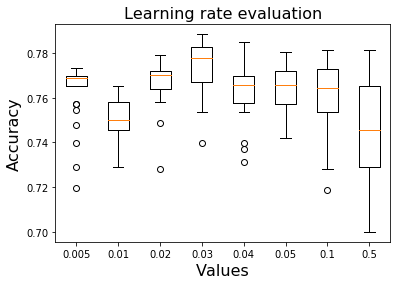

In [64]:
import p9_util_keras
new_key= ''
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'Learning rate evaluation'
x_label = 'Values'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

#### Filter stride size

In [23]:
dict_param_keras_cnn['filter_size'] = 2
dict_param_keras_cnn['nb_filter'] = 64
dict_param_keras_cnn['nb_dense_neuron']=64
dict_param_keras_cnn['conv_layer']=2
dict_param_keras_cnn['dict_param_keras']['dropout_rate']=0.4
dict_param_keras_cnn['dict_param_keras']['nb_epoch']=30

dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 162),
  'batch_size': 500,
  'nb_epoch': 30,
  'verbose': 1,
  'dropout_rate': 0.4,
  'is_batch_normalized': True,
  'lr': 0.03,
  'nbClasses': 2},
 'filter_size': 2,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 64,
 'conv_layer': 2,
 'nb_dense_neuron': 64,
 'dense_layer': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [25]:
import p9_util_keras

dict_hyperparam = {'stride_size' : [1,2]}

dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : stride_size / value= 1
Epoch 1/30
87/87 [==============================] - 12s 133ms/step - loss: 0.6196 - binary_accuracy: 0.6867 - val_loss: 0.5383 - val_binary_accuracy: 0.7360
Epoch 2/30
87/87 [==============================] - 9s 105ms/step - loss: 0.5298 - binary_accuracy: 0.7431 - val_loss: 0.5174 - val_binary_accuracy: 0.7523
Epoch 3/30
87/87 [==============================] - 9s 102ms/step - loss: 0.5117 - binary_accuracy: 0.7547 - val_loss: 0.5139 - val_binary_accuracy: 0.7663
Epoch 4/30
87/87 [==============================] - 9s 108ms/step - loss: 0.5006 - binary_accuracy: 0.7656 - val_loss: 0.5103 - val_binary_accuracy: 0.7605
Epoch 5/30
87/87 [==============================] - 9s 108ms/step - loss: 0.4923 - binary_accuracy: 0.7706 - val_loss: 0.5050 - val_binary_accuracy: 0.7616
Epoch 6/30
87/87 [==============================] - 10s 110ms/step - loss: 0.4875 - binary_accuracy: 0.7717 - val_loss: 0.5012 - val_binary_accuracy: 0.7628
Epoch 7/30
87/87 [========

Param=1: 0.772% (+/-0.012)
Param=2: 0.751% (+/-0.008)


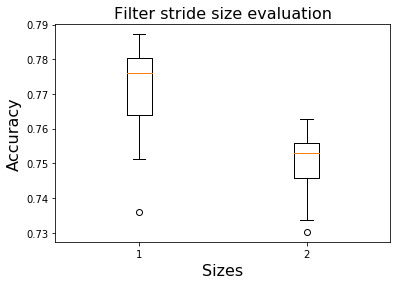

In [29]:
import p9_util_keras
new_key= ''
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'Filter stride size evaluation'
x_label = 'Sizes'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

#### Pool stride size

In [31]:
dict_param_keras_cnn['filter_size'] = 2
dict_param_keras_cnn['nb_filter'] = 64
dict_param_keras_cnn['nb_dense_neuron']=64
dict_param_keras_cnn['conv_layer']=2
dict_param_keras_cnn['stride_size']=1

dict_param_keras_cnn['dict_param_keras']['dropout_rate']=0.4
dict_param_keras_cnn['dict_param_keras']['lr']=0.03

dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 162),
  'batch_size': 500,
  'nb_epoch': 30,
  'verbose': 1,
  'dropout_rate': 0.4,
  'is_batch_normalized': True,
  'lr': 0.03,
  'nbClasses': 2},
 'filter_size': 2,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 64,
 'conv_layer': 2,
 'nb_dense_neuron': 64,
 'dense_layer': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [32]:
import p9_util_keras

dict_hyperparam = {'pool_stride' : [1,2]}

dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : pool_stride / value= 1
Epoch 1/30
87/87 [==============================] - 16s 186ms/step - loss: 0.6034 - binary_accuracy: 0.6977 - val_loss: 0.5276 - val_binary_accuracy: 0.7512
Epoch 2/30
87/87 [==============================] - 11s 131ms/step - loss: 0.5151 - binary_accuracy: 0.7550 - val_loss: 0.5126 - val_binary_accuracy: 0.7640
Epoch 3/30
87/87 [==============================] - 12s 133ms/step - loss: 0.4977 - binary_accuracy: 0.7645 - val_loss: 0.5088 - val_binary_accuracy: 0.7570
Epoch 4/30
87/87 [==============================] - 12s 133ms/step - loss: 0.4884 - binary_accuracy: 0.7710 - val_loss: 0.5055 - val_binary_accuracy: 0.7570
Epoch 5/30
87/87 [==============================] - 11s 131ms/step - loss: 0.4806 - binary_accuracy: 0.7763 - val_loss: 0.5034 - val_binary_accuracy: 0.7721
Epoch 6/30
87/87 [==============================] - 12s 134ms/step - loss: 0.4740 - binary_accuracy: 0.7796 - val_loss: 0.5047 - val_binary_accuracy: 0.7721
Epoch 7/30
87/87 [====

Epoch 23/30
87/87 [==============================] - 9s 99ms/step - loss: 0.3849 - binary_accuracy: 0.8265 - val_loss: 0.5118 - val_binary_accuracy: 0.7756
Epoch 24/30
87/87 [==============================] - 9s 99ms/step - loss: 0.3784 - binary_accuracy: 0.8283 - val_loss: 0.5299 - val_binary_accuracy: 0.7767
Epoch 25/30
87/87 [==============================] - 8s 97ms/step - loss: 0.3718 - binary_accuracy: 0.8326 - val_loss: 0.5255 - val_binary_accuracy: 0.7651
Epoch 26/30
87/87 [==============================] - 9s 98ms/step - loss: 0.3633 - binary_accuracy: 0.8362 - val_loss: 0.5399 - val_binary_accuracy: 0.7640
Epoch 27/30
87/87 [==============================] - 9s 98ms/step - loss: 0.3551 - binary_accuracy: 0.8407 - val_loss: 0.5358 - val_binary_accuracy: 0.7547
Epoch 28/30
87/87 [==============================] - 9s 99ms/step - loss: 0.3515 - binary_accuracy: 0.8427 - val_loss: 0.5553 - val_binary_accuracy: 0.7500
Epoch 29/30
87/87 [==============================] - 9s 98ms/ste

Param=1: 0.769% (+/-0.013)
Param=2: 0.772% (+/-0.012)


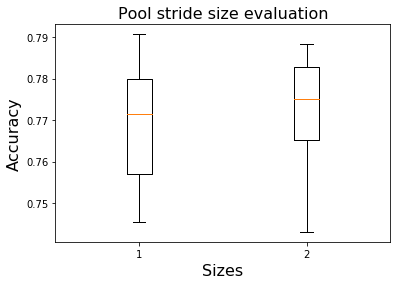

In [33]:
import p9_util_keras
new_key= ''
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'Pool stride size evaluation'
x_label = 'Sizes'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

#### Regularization L1

In [15]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import p9_util_config

dict_param_keras_cnn = p9_util_config.dict_param_keras_cnn.copy()

dict_param_keras_cnn['dict_param_keras']['dropout_rate']=0.0
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (None, None),
  'batch_size': 5000,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.0,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [79]:
import p9_util_keras

dict_hyperparam = {'dict_param_keras' : {'regul' :[('l1',0.0001),('l1',0.001),('l1',0.01),('l1',0.1)]}}
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (None, None),
  'batch_size': 5000,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.0,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [82]:
dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : regul / value= ('l1', 0.0001)

Parameter : regul / value= ('l1', 0.0001)
Epoch 1/10
106/106 [==============================] - 131s 1s/step - loss: 0.6696 - binary_accuracy: 0.6767 - val_loss: 0.6265 - val_binary_accuracy: 0.7010
Epoch 2/10
106/106 [==============================] - 285s 3s/step - loss: 0.5236 - binary_accuracy: 0.7756 - val_loss: 0.6518 - val_binary_accuracy: 0.6892
Epoch 3/10
106/106 [==============================] - 227s 2s/step - loss: 0.4029 - binary_accuracy: 0.8500 - val_loss: 0.7281 - val_binary_accuracy: 0.6808
Epoch 4/10
106/106 [==============================] - 101s 956ms/step - loss: 0.2514 - binary_accuracy: 0.9248 - val_loss: 0.8971 - val_binary_accuracy: 0.6693
Epoch 5/10
106/106 [==============================] - 87s 823ms/step - loss: 0.1517 - binary_accuracy: 0.9661 - val_loss: 1.1386 - val_binary_accuracy: 0.6658
Epoch 6/10
106/106 [==============================] - 87s 820ms/step - loss: 0.1070 - binary_accuracy: 0.9834 - val_loss: 1.

Param=1,0,0,0,0,1: 0.676% (+/-0.012)
Param=1,0,0,0,1: 0.681% (+/-0.010)
Param=1,0,0,1: 0.671% (+/-0.014)
Param=1,0,1: 0.679% (+/-0.011)


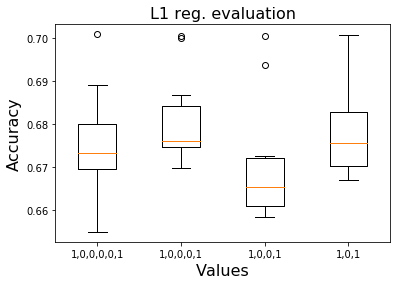

In [84]:
import p9_util_keras
new_key= 'L'
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'L1 reg. evaluation'
x_label = 'Values'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

#### Regularization L2

In [85]:
import p9_util_keras

dict_hyperparam = {'dict_param_keras' : {'regul' :[('l2',0.0001),('l2',0.001),('l2',0.01),('l2',0.1)]}}
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 166),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.0,
  'regul': ('l1', 0.1),
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [86]:
dict_list_val_acc = p9_util_keras.evaluate_model(dict_hyperparam, train_generator, valid_generator, \
                                                dict_param_keras_cnn= dict_param_keras_cnn,\
                                                key_validation='val_binary_accuracy')


Parameter : regul / value= ('l2', 0.0001)

Parameter : regul / value= ('l2', 0.0001)
Epoch 1/10
106/106 [==============================] - 131s 1s/step - loss: 0.6552 - binary_accuracy: 0.6737 - val_loss: 0.6065 - val_binary_accuracy: 0.7039
Epoch 2/10
106/106 [==============================] - 225s 2s/step - loss: 0.5172 - binary_accuracy: 0.7687 - val_loss: 0.6067 - val_binary_accuracy: 0.6995
Epoch 3/10
106/106 [==============================] - 232s 2s/step - loss: 0.4076 - binary_accuracy: 0.8408 - val_loss: 0.7095 - val_binary_accuracy: 0.6726
Epoch 4/10
106/106 [==============================] - 191s 2s/step - loss: 0.2641 - binary_accuracy: 0.9161 - val_loss: 0.8620 - val_binary_accuracy: 0.6649
Epoch 5/10
106/106 [==============================] - 129s 1s/step - loss: 0.1627 - binary_accuracy: 0.9611 - val_loss: 1.0093 - val_binary_accuracy: 0.6774
Epoch 6/10
106/106 [==============================] - 125s 1s/step - loss: 0.1083 - binary_accuracy: 0.9828 - val_loss: 1.1815 - 

Param=2,0,0,0,0,1: 0.682% (+/-0.012)
Param=2,0,0,0,1: 0.669% (+/-0.012)
Param=2,0,0,1: 0.668% (+/-0.061)
Param=2,0,1: 0.495% (+/-0.044)


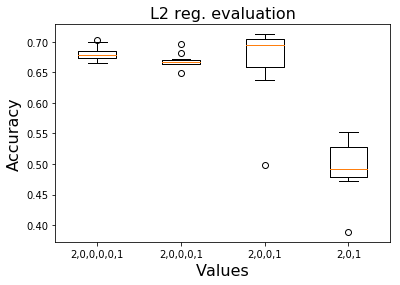

In [87]:
import p9_util_keras
new_key= 'L'
dict_newkey = p9_util_keras.replace_dictkey(dict_list_val_acc, new_key)

title= 'L2 reg. evaluation'
x_label = 'Values'
y_label = 'Accuracy'
p9_util_keras.display_evaluation(dict_newkey, title=title, x_label=x_label, y_label=y_label)

# <font color=blus>3. CNN processing using Keras</font>

#### CNN Keras configuration from DataGenerator

In [30]:
import p9_util_config
p9_util_config.dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (None, None),
  'batch_size': 5000,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.3,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [31]:
import p9_util_config

#---------------------------------------------------------------
# Update of generic paramaters depending of DataGenerator 
#---------------------------------------------------------------
dict_param_keras_cnn = p9_util_config.dict_param_keras_cnn.copy()
if False :
    dict_param_keras_cnn['nb_dense_neuron'] = 8
    dict_param_keras_cnn['dense_layer'] = 2

    dict_param_keras_cnn['conv_layer'] = 1

dict_param_keras = dict_param_keras_cnn['dict_param_keras'].copy()
dict_param_keras['input_dim']          = train_generator.get_params()['keras_input_dim']
dict_param_keras['batch_size']         = train_generator.get_params()['batch_size']
dict_param_keras['nbClasses']         = train_generator.get_params()['n_classes']
#dict_param_keras['dropout_rate']      = 0.
#dict_param_keras['lr'] = 0.1

dict_param_keras_cnn['dict_param_keras'] = dict_param_keras.copy()
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (None, 300),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.3,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 0.01,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

#### Hyper-parameters values issued from search

In [109]:
dict_param_keras_cnn['filter_size'] = 2
dict_param_keras_cnn['nb_filter'] = 64
dict_param_keras_cnn['nb_dense_neuron']=64
dict_param_keras_cnn['conv_layer']=2
dict_param_keras_cnn['stride_size']=1
dict_param_keras_cnn['pool_stride']=1

#dict_param_keras_cnn['dict_param_keras']['dropout_rate']=0.4
dict_param_keras_cnn['dict_param_keras']['dropout_rate']=0.9
dict_param_keras_cnn['dict_param_keras']['lr']=0.03

dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (40, 166),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.9,
  'is_batch_normalized': True,
  'lr': 0.03,
  'nbClasses': 2},
 'filter_size': 2,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 1,
 'nb_filter': 64,
 'conv_layer': 2,
 'nb_dense_neuron': 64,
 'dense_layer': 1,
 'list_channel': [],
 'list_filter_channel': []}

#### Build of keras CNN model

Ouptput layer dimensions for convolutional network is computed as following : 

*  <code>C = [(I-F + 2*P)/S] +1</code> where :
    * <code>C</code> is the dimension of the ouput convolutional layer;
    * <code>I</code> is the input size
    * <code>F</code> is the convolutional filter size
    * <code>P</code> is the padding size (0 here)
    * <code>S</code> is the srtides

Strides value of <code>S</code> allows to regard a bulk of <code>S</code> consecutive words for sentences patterns exploration. 

For compilation, a learning rate of <code>0.03</code> increases the speed of learning and still keeps the 
learning process smooth. 

Batch normalization ensures a smooth learning.

In [110]:
import p9_util_keras

model = p9_util_keras.keras_cnn_build(**dict_param_keras_cnn)
model.summary()

W0925 16:18:12.241745 140215085389632 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0925 16:18:12.243044 140215085389632 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0925 16:18:12.244669 140215085389632 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0925 16:18:12.266541 140215085389632 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 64)            21312     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 64)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 39, 64)            8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 39, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 38, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2432)              0         
__________

#### Model evaluation

In [111]:
import p9_util_config
# Train and evaluate model on dataset
#epochs = p9_util_config.dict_param_keras_cnn['dict_param_keras']['nb_epoch']
epochs = 40
verbose = p9_util_config.dict_param_keras_cnn['dict_param_keras']['verbose']

history = model.fit_generator(generator=train_generator,
                              validation_data=valid_generator,
                              use_multiprocessing=False,
                              workers=1, 
                              verbose=verbose, 
                              epochs=epochs)

Epoch 1/40
173/173 [==============================] - 51s 294ms/step - loss: 0.6400 - binary_accuracy: 0.6774 - val_loss: 0.6141 - val_binary_accuracy: 0.6942
Epoch 2/40
173/173 [==============================] - 50s 291ms/step - loss: 0.6230 - binary_accuracy: 0.6853 - val_loss: 0.6076 - val_binary_accuracy: 0.6942
Epoch 3/40
173/173 [==============================] - 54s 312ms/step - loss: 0.6064 - binary_accuracy: 0.6929 - val_loss: 0.5694 - val_binary_accuracy: 0.7131
Epoch 4/40
173/173 [==============================] - 51s 297ms/step - loss: 0.5763 - binary_accuracy: 0.7140 - val_loss: 0.5488 - val_binary_accuracy: 0.7214
Epoch 5/40
173/173 [==============================] - 52s 302ms/step - loss: 0.5567 - binary_accuracy: 0.7286 - val_loss: 0.5369 - val_binary_accuracy: 0.7332
Epoch 6/40
173/173 [==============================] - 62s 359ms/step - loss: 0.5449 - binary_accuracy: 0.7366 - val_loss: 0.5288 - val_binary_accuracy: 0.7367
Epoch 7/40
173/173 [==========================

#### Backup / restore model and history.

In [2]:
import keras
import p5_util
import p9_util_config
import p9_util_keras


#list_channel= p9_util_config.dict_param_generator['list_keras_channel']


#core_name = p9_util_keras.build_model_core_name(dict_param_keras_cnn)
core_name = "_f2_s1_p2_nbf64_cnv2_d1_dor0.9_nbn64_Lch"

if False:
    model.save("./data/model_"+core_name+".h5")
    p5_util.object_dump(history, "history_"+core_name+".dump")
else :    
    model = keras.models.load_model("./data/model_"+core_name+".h5")
    history = p5_util.object_load("history_"+core_name+".dump")

model.summary()
print("")
print(core_name)

W0925 16:56:54.645308 140174747273024 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0925 16:56:54.659628 140174747273024 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0925 16:56:54.678198 140174747273024 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0925 16:56:54.740799 140174747273024 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Pl

p5_util.object_load : fileName= history__f2_s1_p2_nbf64_cnv2_d1_dor0.9_nbn64_Lch.dump


W0925 16:56:57.477052 140174747273024 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0925 16:56:57.669019 140174747273024 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 64)            21312     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 64)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 39, 64)            8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 39, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 38, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2432)              0         
__________

_f2_s1_p2_nbf64_cnv2_d1_dor0.9_nbn64_Lch


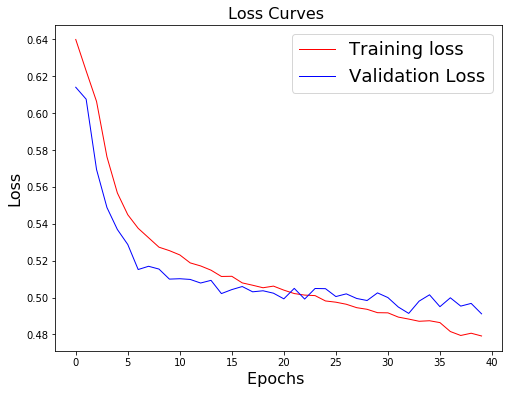

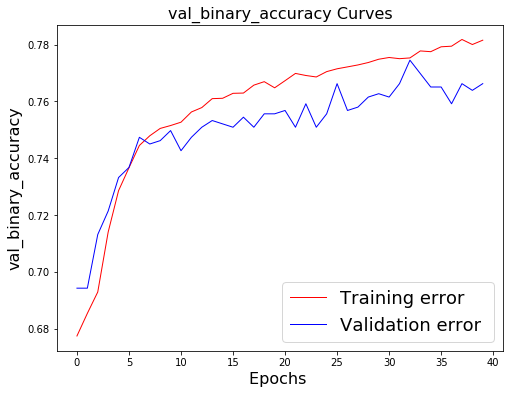

In [3]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend=''
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

In [14]:
X_valid.shape
import numpy as np
x = np.vstack([X_valid[0],X_valid[1]])
x.shape, X_valid.shape

((80, 166), (100, 40, 166))

In [71]:
y_valid_label_row = [p9_util.get_label_from_row(y_valid[row], indicator=1) for row in range(0,end_row)]
for i in range(len(y_valid_label_row)) :
    if y_valid_label_row[i] != 0 :
        print(i,y_valid_label_row[i])

333 1
436 1


In [61]:
y_predict[100:110]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [58]:
end_row

47

/home/bangui/.local/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packa

[0, 1]

Confusion matrix for all classes : 

[[554  34]
 [164  95]]

Normalized confusion matrix
[[0.94217687 0.05782313]
 [0.63320463 0.36679537]]
Confusion matrix, without normalization
[[554  34]
 [164  95]]

TP rate = [0.         0.36679537 1.        ]
FP rate = [0.         0.05782313 1.        ]


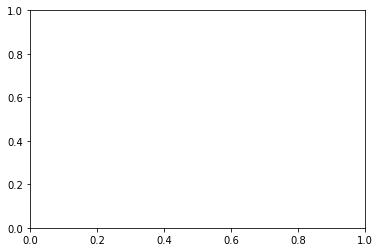

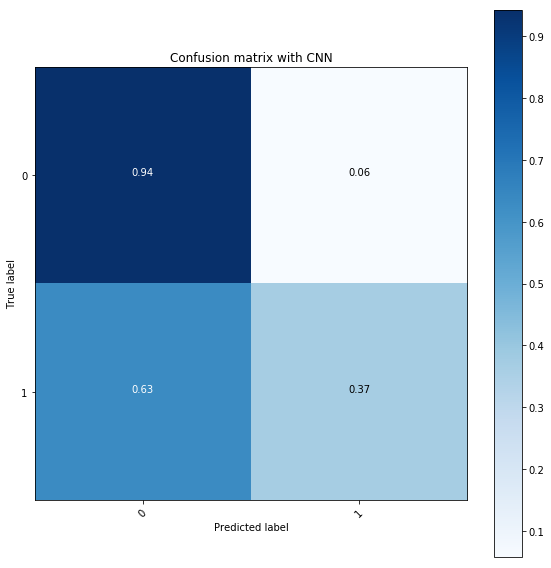

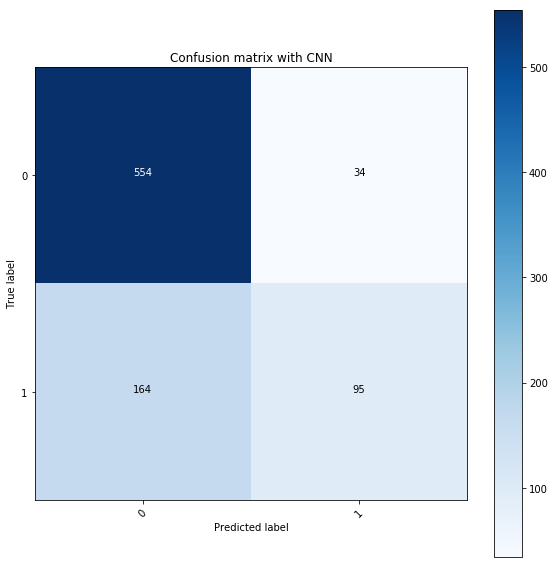

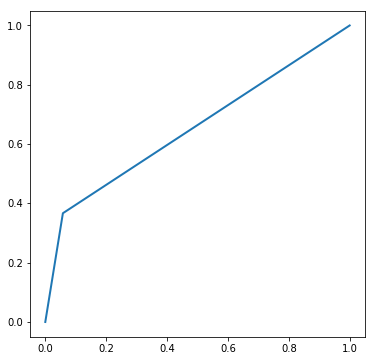

In [6]:
import numpy as np
import p9_util
#----------------------------------------------------------
# Build X for validation from data generator
#----------------------------------------------------------
X_valid = np.zeros((valid_generator.nb_record,\
                    valid_generator[0][0].shape[1],\
                    valid_generator[0][0].shape[2]))

y_valid = np.zeros((valid_generator.nb_record, valid_generator[0][1].shape[1]))
start_row = 0
for i in range(len(valid_generator)) :
    X, y = valid_generator[i]
    
    nb_row = X.shape[0]
    end_row = start_row + nb_row
    X_valid[start_row:end_row,] = X
    y_valid[start_row:end_row,] = y
    start_row = end_row
    
y_predict = np.round(model.predict(X_valid))

y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict, \
                                      title="Confusion matrix with CNN")

_f2_s1_p2_nbf64_cnv2_d1_dor0.9_nbn64_Lch


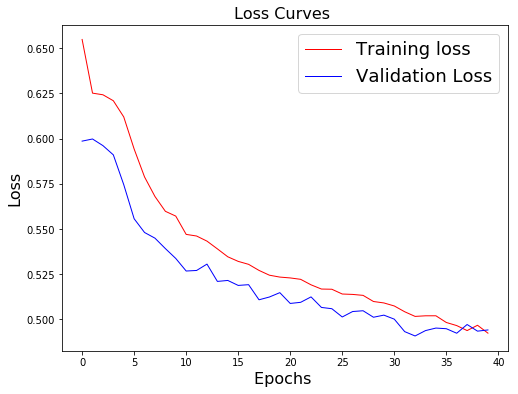

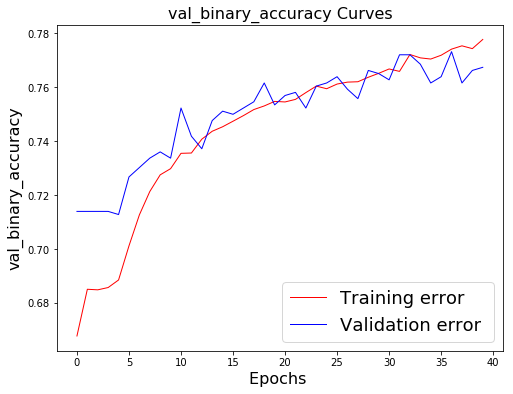

In [70]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend=''
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

[0, 1]

Confusion matrix for all classes : 

[[347   1]
 [107  45]]

Normalized confusion matrix
[[0.99712644 0.00287356]
 [0.70394737 0.29605263]]
Confusion matrix, without normalization
[[347   1]
 [107  45]]

TP rate = [0.         0.29605263 1.        ]
FP rate = [0.         0.00287356 1.        ]


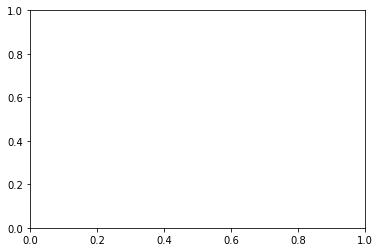

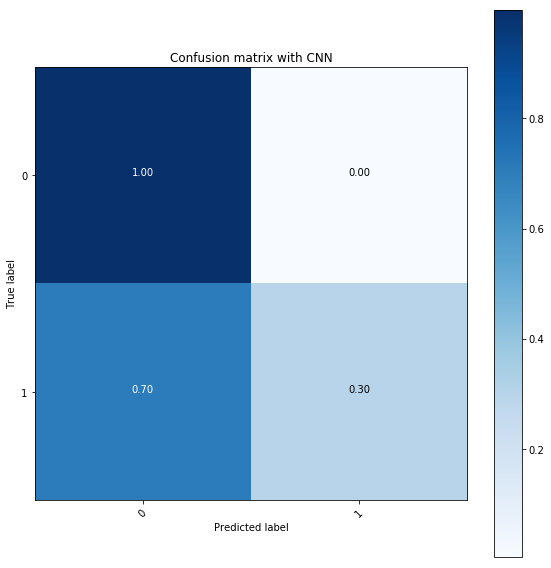

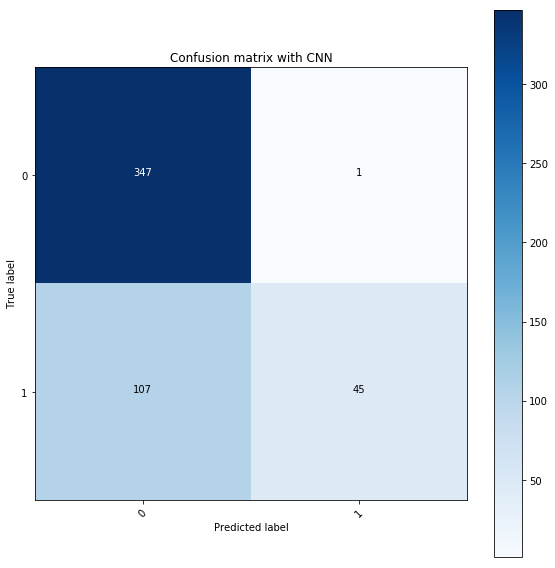

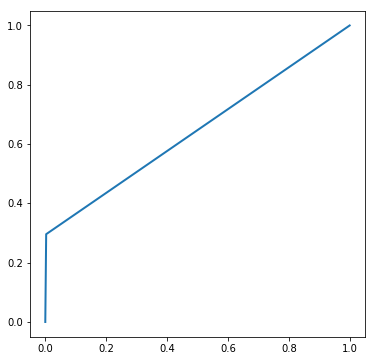

In [73]:
import numpy as np
X_valid, y_valid = valid_generator[1]
y_predict = np.round(model.predict(X_valid))


import p9_util
y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict, \
                                      title="Confusion matrix with CNN")

_f2_s1_p2_nbf64_cnv2_d1_dor0.9_nbn64_Lch


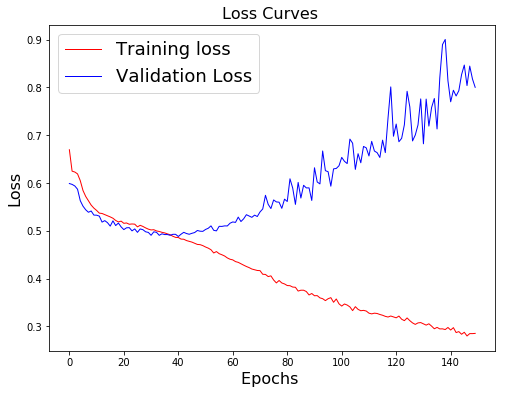

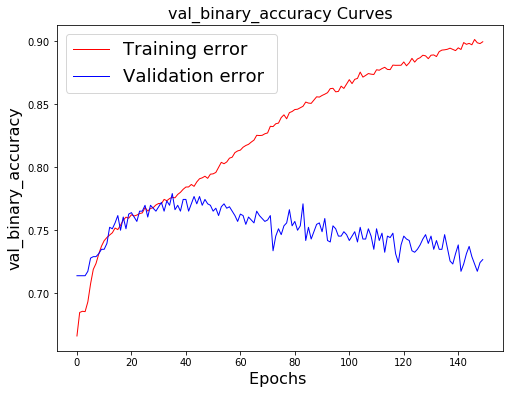

In [63]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend=''
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

[0, 1]

Confusion matrix for all classes : 

[[65  7]
 [15 13]]

Normalized confusion matrix
[[0.90277778 0.09722222]
 [0.53571429 0.46428571]]
Confusion matrix, without normalization
[[65  7]
 [15 13]]

TP rate = [0.         0.46428571 1.        ]
FP rate = [0.         0.09722222 1.        ]


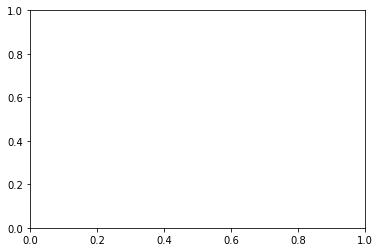

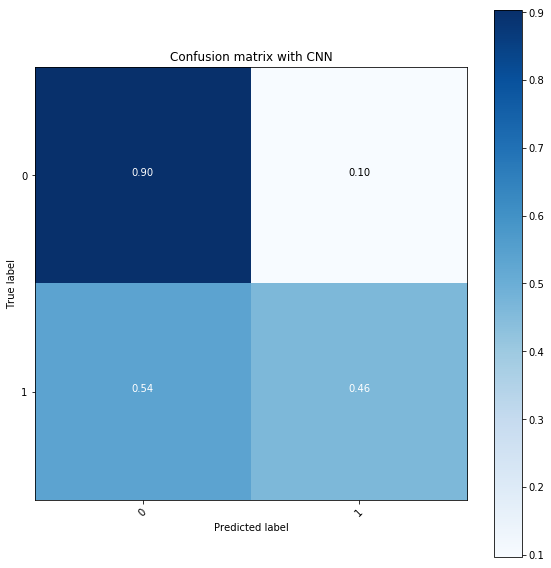

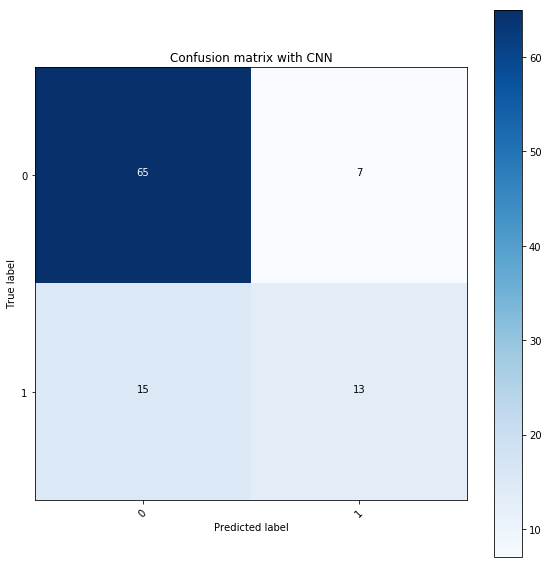

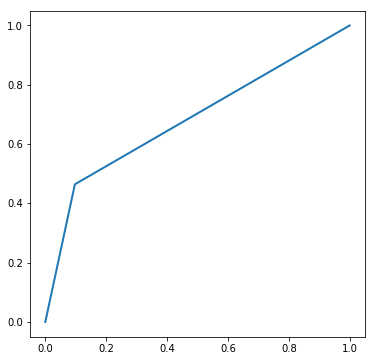

In [65]:
import numpy as np
X_valid, y_valid = valid_generator[0]
y_predict = np.round(model.predict(X_valid))


import p9_util
y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict, \
                                      title="Confusion matrix with CNN")

_f2_s1_p2_nbf64_cnv2_d1_dor0.9_nbn64_Lch_2


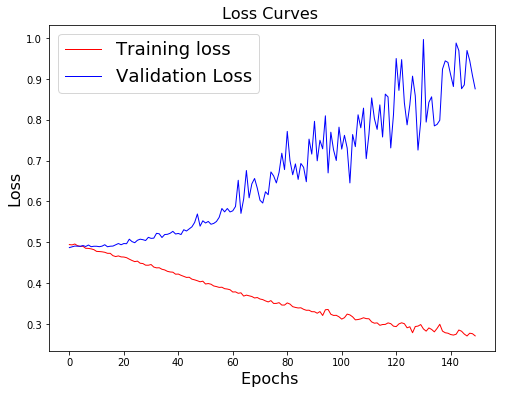

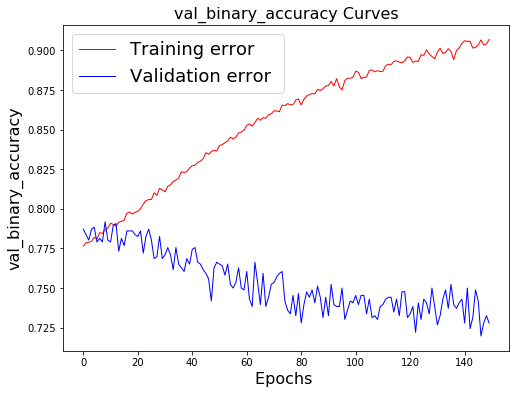

In [22]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend=''
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

_f2_s1_p2_nbf64_cnv2_d1_dor0.9_nbn64_Lch


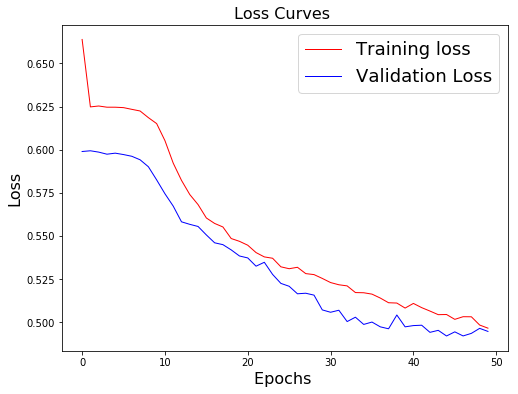

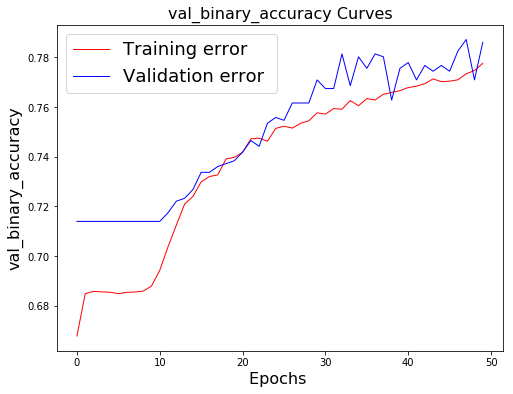

In [18]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend=''
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

_f2_s1_p2_nbf64_cnv2_d1_dor0.8_nbn64_Lch


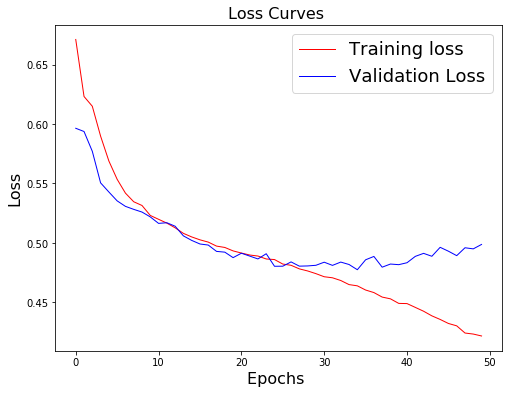

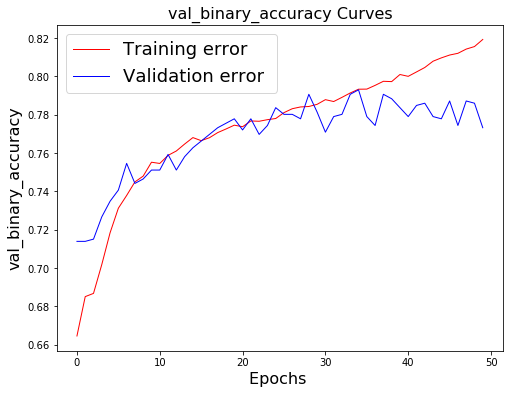

In [13]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend=''
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

_f2_s1_p2_nbf64_cnv2_d1_dor0.4_nbn64_Lch


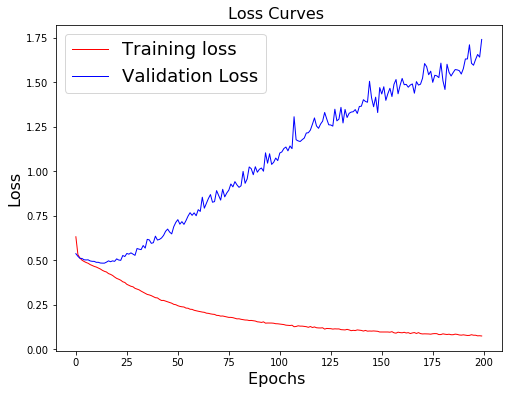

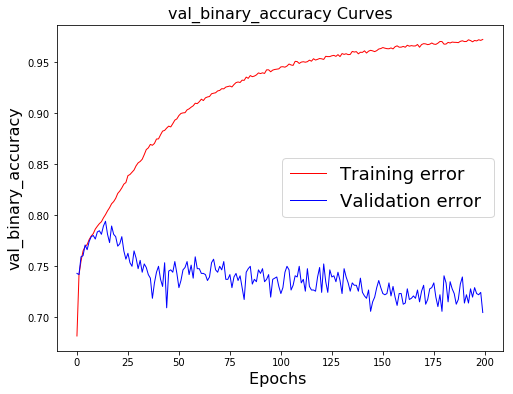

In [8]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend=''
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

_f3_s1_p2_nbf128_cnv3_d1_dor0.2_nbn64_Lch


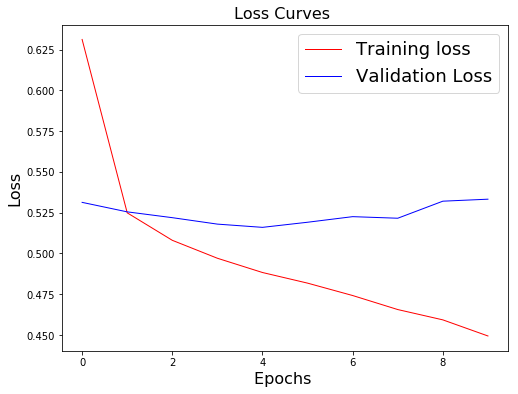

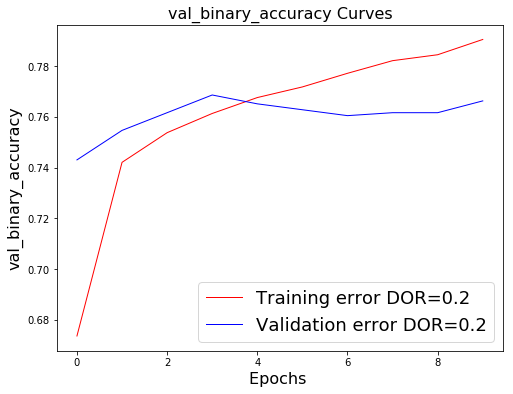

In [36]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend='DOR=0.2'
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

_f3_s1_p2_nbf128_cnv3_d1_dor0.0_nbn64_Lch


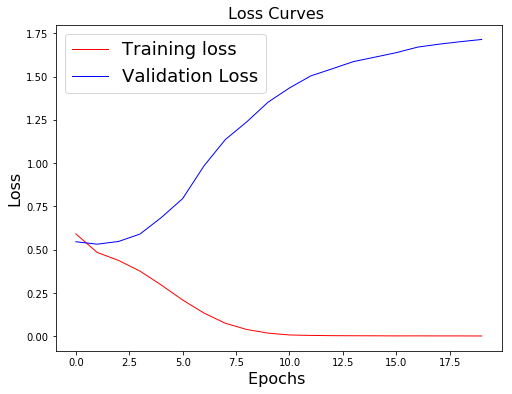

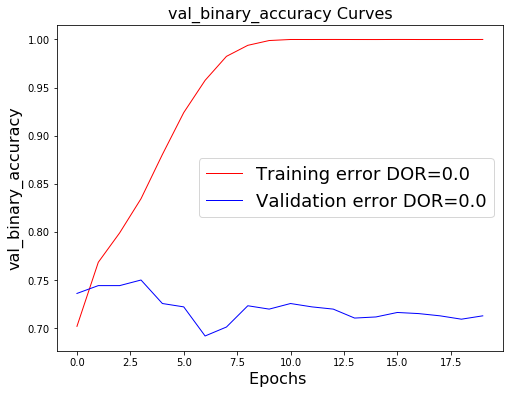

In [31]:
import p7_util
print(core_name)
max_length=''
legend='length='+str(max_length)
legend='DOR=0.0'
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

In [15]:
#import keras
#keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')


## <font color=blus>2.1. Modeling a classifier model</font>

In [ ]:
print("Vocabulary size= {}".format(vocab_size))
print("Batch size= {}".format(dict_param['batch_size']))   
dimension = dict_param['dim'][0]
print("Input data size= {}".format(dimension))    

In [ ]:
filter_size = 7
strides = filter_size-1

print("Expected defaut dimension for 1st hidden layer : {}".format(round((dict_param['dim'][0]-filter_size+2*0)/strides +1)))

In [ ]:
import p9_util
nb_channel=0
model = p9_util.keras_cnn_build(dict_param['dim'],nbClasses=dict_param['n_classes'], \
                                strides=strides, nb_filter=128, filter_size=strides, \
                                lr=1.e-2, dropout_rate=0., \
                                conv_layer=1,nb_dense_neuron=128,\
                                dense_layer=1)
model.summary()

In [ ]:
# Train model on dataset
history = model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    use_multiprocessing=False,
                    workers=1, verbose=1, epochs=20)

#### CNN model and history are either saved or restored depending a Boolean flag.

`core_name` is a parameter identifying a model through its name.

This name may be changed depending model parameters.

In [ ]:
core_name = "cnn_6layers"

In [ ]:
import keras
import p5_util

if True:
    model.save("./data/model_"+core_name+".h5")
    p5_util.object_dump(history, "history_"+core_name+".dump")
    #p5_util.object_dump(max_length, "max_length_"+core_name+".dump")

In [ ]:
import keras
import p5_util

if False :
    pass
else :
    model = keras.models.load_model("./data/model_"+core_name+".h5")
    history = p5_util.object_load("history_"+core_name+".dump")
    #max_length = p5_util.object_load("max_length_"+core_name+".dump")

#print("\nInput data length= {}".format(max_length))
model.summary()

In [ ]:
history.history

    Metric and loss curves are displayed for train and test dataset.

In [ ]:
for key, values in history.history.items() :
    history.history[key] = values[1:]
history.history

In [ ]:
import p7_util
max_length=''
list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend='length='+str(max_length))

## <font color=blus>2.2. Predictions with classifier model</font>

In [ ]:
dataPreparator_test.df_data.columns

In [ ]:
index=246
print(y_test[index])
print(dataPreparator_test.df_data.docs.loc[index], dataPreparator_test.df_data.target.loc[index])
#dataPreparator_test.df_data.vector.loc[10]

In [ ]:
test_generator.n_channels, test_generator.n_classes

In [ ]:
file_id = 0
file_name = list(test_generator.dict_X.values())[file_id]
print(file_name)

y = test_generator.dict_label[file_name]
print(len(y))
arr_index_label = np.where(y==1)[0]
index = arr_index_label[2]
print(arr_index_label, index)

In [ ]:
length = len(test_generator)
print(length)
for batch_id in range(length) :
    start_batch_index = batch_id*test_generator.batch_size
    end_batch_index   = min((batch_id+1)*test_generator.batch_size,test_generator.len_data)
    if index > start_batch_index and index < end_batch_index :
        print("Batch ID= {}".format(batch_id))
        break
batch_id, start_batch_index, end_batch_index


In [ ]:
y_label = keras.utils.to_categorical(y, num_classes=test_generator.n_classes,dtype='int')

y_label[arr_index_label_1]

In [ ]:
#model.predict(dataPreparator_test.df_data.vector.loc[10])
#test_generator[10]
X_batch, y_batch = test_generator[batch_id]
print(X_batch.shape)
index_ = index - batch_id*test_generator.batch_size
X = X_batch[index_].reshape(-1,X_batch.shape[1],X_batch.shape[2])
print(X.shape)
model.predict(X)
#X.reshape(-1,300,1).shape

## <font color=blus>2.3. Words embeddings</font>

### <font color=blus>2.3.1. Building embeddings with Glove</font>

Dictionary `{word:glove_coefficient}` is built from Glove file name.

Glove file has been prealably downloaded.

Once built, dictionary allows to build a vector for every word 
in vocabulary issued from tokenizer.

Using glove file defined here-under, each word is a vector of dimension 100. This dimension is 
referenced in the Glove file name part as `100d`

Endly, weights matrix is built from vocabulary issued from tokenizer. 

Such process is summarized with sequences here-under :
    * dict_glove_word_coeff <-- processing Glove file name
    * vocabulary_word, index <-- tokenizer
    * weight_vector = dict_glove_word_coeff[vocabulary_word]
    * weight_matrix[index] = weight_vector

In [ ]:
import numpy as np
import p5_util

filename = './data/embbeding_glove.dump'

weight_matrix = p5_util.object_load(filename)
    
print("")
print("Embedding shape=  {}".format(weight_matrix.shape))


In [ ]:
import p9_util

embedding_dim=100
dimension = X_train.shape[1]
params = {'dim': (dimension,embedding_dim),
          'batch_size': 100,
          'n_classes': 0,
          'n_channels': 0,
          'shuffle': False}
print(params)

In [ ]:
# Data Generators
import DataGenerator
len_train = X_train.shape[0]
train_generator = DataGenerator.DataGenerator(dict_train_partition, dict_train_label, partition_size, len_train,**params)

len_test = X_test.shape[0]
test_generator = DataGenerator.DataGenerator(dict_test_partition, dict_test_label, partition_size,len_test, **params)

In [ ]:
filter_size = 9
strides = filter_size-1
nb_filter=128
print("Expected defaut dimension for 1st hidden layer : {}".format(round((vector_dimension-filter_size+2*0)/strides +1)))

In [ ]:
vector_dimension
vocab_size=weight_matrix.shape[0]


In [ ]:
import p9_util
embedding_dim=100
model = p9_util.keras_cnn_build((vector_dimension, embedding_dim),nbClasses=1, \
                                strides=strides, nb_filter=nb_filter, filter_size=strides, lr=1.e-2,\
                               isWordEmbedding = True, vocab_size = vocab_size,weight_matrix=weight_matrix)
model.summary()

In [ ]:
# Train model on dataset
history = model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    use_multiprocessing=False,
                    workers=4, verbose=1, epochs=20)

# <font color=blus>4. Model training with K-fold</font>

In [11]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
train_generator.n_classes = 2
train_generator.get_params()

{'keras_input_dim': (40, 166),
 'batch_size': 500,
 'n_classes': 2,
 'n_channels': 0,
 'is_shuffle': False,
 'keras_nb_channel': 0,
 'list_keras_channel': [],
 'data_type': 'train',
 'proj_dimension': None,
 'is_dimension_mux': False}

In [14]:
import p9_util_keras
p9_util_keras.keras_model_evaluate_kfold(train_generator, batch_count = 30)


dict_param_keras {'input_dim': (40, 166), 'batch_size': 500, 'nb_epoch': 10, 'verbose': 1, 'dropout_rate': 0.3, 'regul': (None, None), 'is_batch_normalized': True, 'lr': 0.01, 'nbClasses': 2}
filter_size 3
stride_size 1
pool_size 2
pool_stride 2
nb_filter 256
conv_layer 4
nb_dense_neuron 128
dense_layer 1
dense_layer_decrease_rate 1
list_channel []
list_filter_channel []

Batch ID= 0/30
Epoch 1/10
105/105 [==============================] - 49s 468ms/step - loss: 0.6401 - binary_accuracy: 0.6656 - val_loss: 0.5738 - val_binary_accuracy: 0.6740
Epoch 2/10
105/105 [==============================] - 43s 412ms/step - loss: 0.5257 - binary_accuracy: 0.7402 - val_loss: 0.5527 - val_binary_accuracy: 0.7040
Epoch 3/10
105/105 [==============================] - 43s 410ms/step - loss: 0.4709 - binary_accuracy: 0.7770 - val_loss: 0.5779 - val_binary_accuracy: 0.7020
Epoch 4/10
105/105 [==============================] - 42s 398ms/step - loss: 0.3930 - binary_accuracy: 0.8225 - val_loss: 0.6420 - v

Epoch 5/10
105/105 [==============================] - 32s 304ms/step - loss: 6.3050e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 6/10
105/105 [==============================] - 32s 303ms/step - loss: 5.6373e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 7/10
105/105 [==============================] - 32s 302ms/step - loss: 6.5817e-04 - binary_accuracy: 0.9998 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 8/10
105/105 [==============================] - 32s 303ms/step - loss: 6.3120e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 9/10
105/105 [==============================] - 32s 303ms/step - loss: 5.2593e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 10/10
105/105 [==============================] - 32s 307ms/step - loss: 5.3748e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
object_dump: file nam

105/105 [==============================] - 32s 309ms/step - loss: 4.0839e-04 - binary_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 5/10
105/105 [==============================] - 32s 303ms/step - loss: 4.0890e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 6/10
105/105 [==============================] - 32s 301ms/step - loss: 3.9504e-04 - binary_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 7/10
105/105 [==============================] - 31s 299ms/step - loss: 4.0097e-04 - binary_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 8/10
105/105 [==============================] - 32s 309ms/step - loss: 3.8230e-04 - binary_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 9/10
105/105 [==============================] - 32s 306ms/step - loss: 3.9663e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 10/10
105/105 [============

105/105 [==============================] - 31s 300ms/step - loss: 3.6163e-04 - binary_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 4/10
105/105 [==============================] - 32s 309ms/step - loss: 3.5247e-04 - binary_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 5/10
105/105 [==============================] - 32s 309ms/step - loss: 3.7368e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 6/10
105/105 [==============================] - 33s 312ms/step - loss: 3.6796e-04 - binary_accuracy: 0.9999 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 7/10
105/105 [==============================] - 33s 310ms/step - loss: 3.5972e-04 - binary_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 8/10
105/105 [==============================] - 32s 303ms/step - loss: 3.5210e-04 - binary_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9980
Epoch 9/10
105/105 [=============

{0: {'val_loss': [0.5738073587417603,
   0.5527447462081909,
   0.5778586864471436,
   0.642042875289917,
   0.7940353751182556,
   0.9343138337135315,
   1.0334172248840332,
   1.30844247341156,
   1.300968050956726,
   1.3368264436721802],
  'val_binary_accuracy': [0.6740000247955322,
   0.7039999961853027,
   0.7020000219345093,
   0.6899999976158142,
   0.6940000057220459,
   0.6740000247955322,
   0.6859999895095825,
   0.671999990940094,
   0.7020000219345093,
   0.6940000057220459],
  'loss': [0.6407535194486049,
   0.5270413380716497,
   0.4727207614543721,
   0.39473840729928333,
   0.2961406172184751,
   0.20960292948076184,
   0.1588126475145047,
   0.12249342119033528,
   0.09826982339691216,
   0.08134998767622957],
  'binary_accuracy': [0.6651636654186369,
   0.7387658781822143,
   0.7758931651613682,
   0.8214436462553232,
   0.8747841425463337,
   0.9150773265639097,
   0.9385049323072419,
   0.9513411870495522,
   0.9622011577878554,
   0.9697801168719102]},
 1: {'val_

In [2]:
import p5_util
import p9_util_keras
import p9_util_config

filename = "./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128__Lch_29.dill"
ddict_history_kfold_ = p5_util.object_load(filename)

dict_param_keras_cnn = p9_util_config.dict_param_keras_cnn

epochs = dict_param_keras_cnn['dict_param_keras']['nb_epoch']
df_history_score = p9_util_keras.build_df_history_score_from_kfold(ddict_history_kfold_, epochs)

keras_history = p9_util_keras.build_keras_history_from_df_score(df_history_score)

p5_util.object_load : fileName= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128__Lch_29.dill


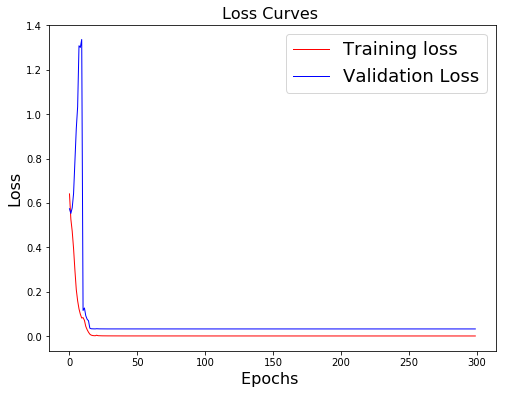

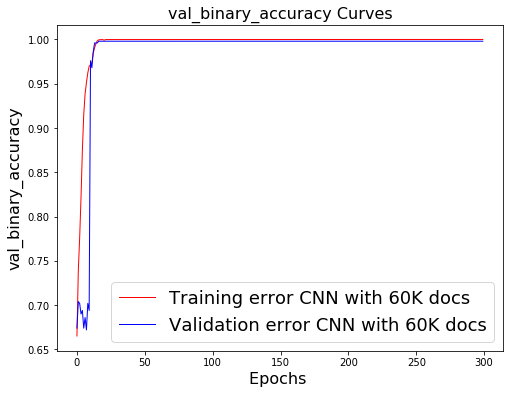

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN with 60K docs"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=keras_history, legend=legend)

In [9]:
batch_start = 0

W1003 07:39:15.941958 139642336790336 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 07:39:15.944572 139642336790336 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1003 07:39:15.963724 139642336790336 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1003 07:39:16.015161 139642336790336 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Pl

(8809, 40, 166)
(8809, 2)
8809/8809 [==============================] - 9s 1ms/step
[0, 1]

Confusion matrix for all classes : 

[[2856 1391]
 [1418 3144]]

Normalized confusion matrix
[[0.67247469 0.32752531]
 [0.31082858 0.68917142]]
Confusion matrix, without normalization
[[2856 1391]
 [1418 3144]]

TP rate = [0.         0.68917142 1.        ]
FP rate = [0.         0.32752531 1.        ]
AUC = 0.6808230520303318


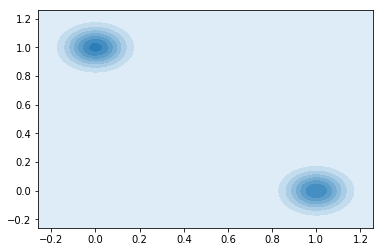

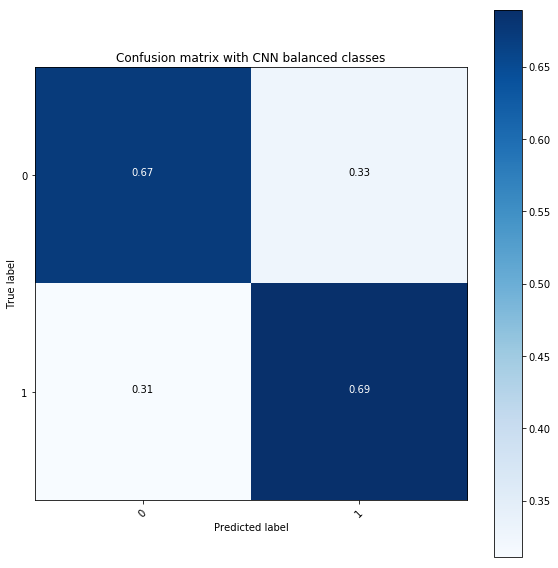

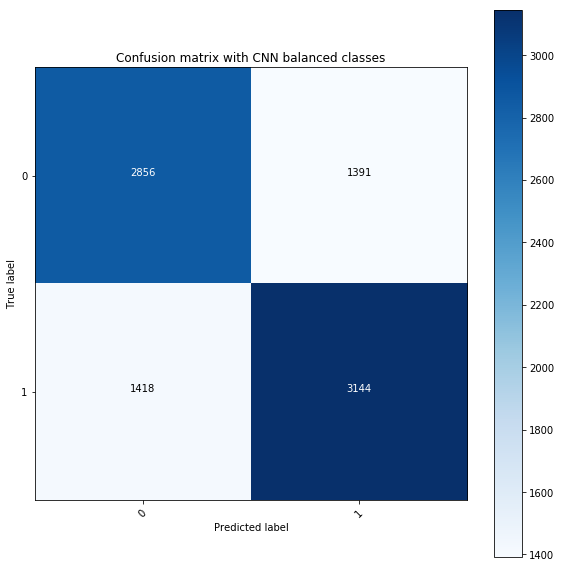

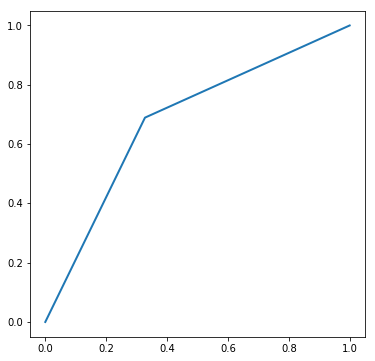

In [10]:
import numpy as np
import keras

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128__Lch.h5"
model = keras.models.load_model(filename_model)

y_valid = valid_generator._get_y(batch_start=batch_start)
X_valid = valid_generator._get_X(batch_start=batch_start)

y_valid =y_valid.astype(int)
print(X_valid.shape)
print(y_valid.shape)

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)


import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

In [9]:
import p5_util
import p9_util_keras
import p9_util_config

filename = "./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128_Lch_55.dill"
ddict_history_kfold_ = p5_util.object_load(filename)

dict_param_keras_cnn = p9_util_config.dict_param_keras_cnn

epochs = dict_param_keras_cnn['dict_param_keras']['nb_epoch']
df_history_score = p9_util_keras.build_df_history_score_from_kfold(ddict_history_kfold_, epochs)

keras_history = p9_util_keras.build_keras_history_from_df_score(df_history_score)

p5_util.object_load : fileName= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128_Lch_55.dill


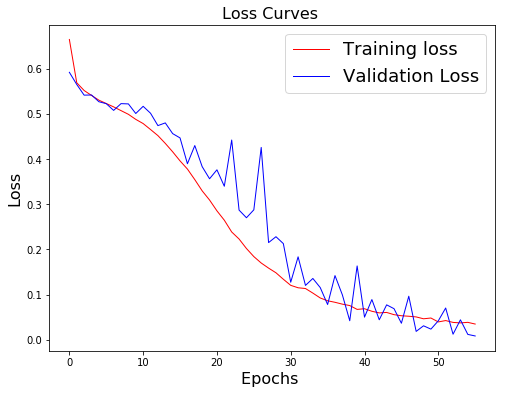

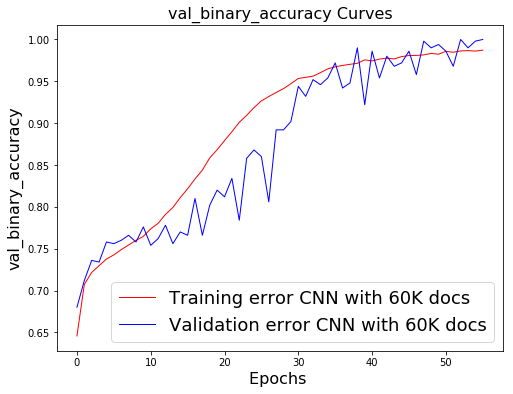

In [10]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN with 60K docs"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=keras_history, legend=legend)

In [7]:
len(valid_generator)

18

In [84]:
batch_start = 16

(809, 40, 166)
(809, 2)
809/809 [==============================] - 5s 6ms/step
[0, 1]

Confusion matrix for all classes : 

[[279  96]
 [160 274]]

Normalized confusion matrix
[[0.744      0.256     ]
 [0.36866359 0.63133641]]
Confusion matrix, without normalization
[[279  96]
 [160 274]]

TP rate = [0.         0.63133641 1.        ]
FP rate = [0.    0.256 1.   ]
AUC = 0.687668202764977


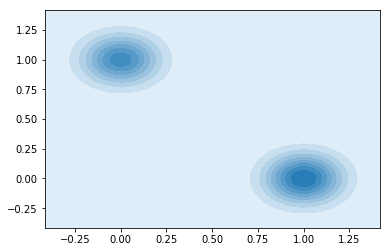

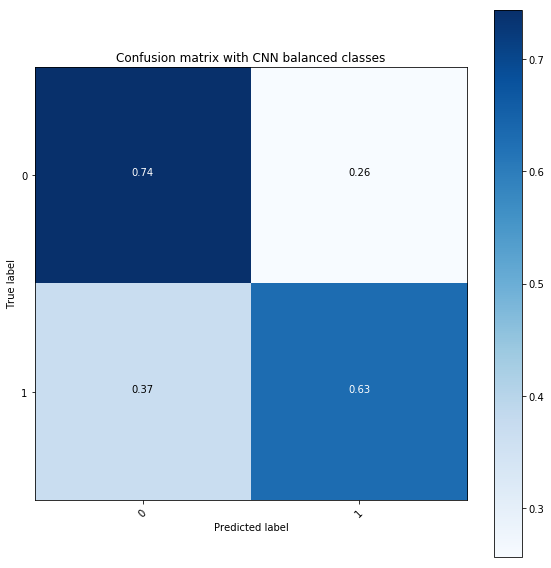

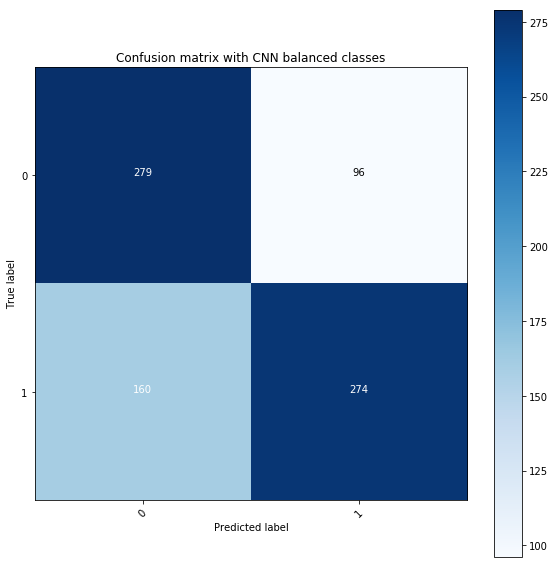

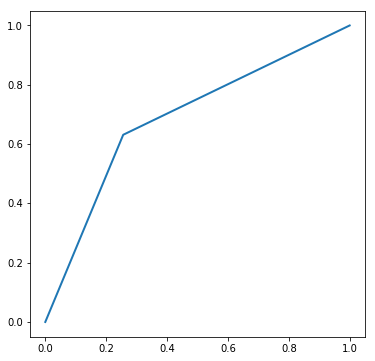

In [86]:
import numpy as np
import keras

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

y_valid = valid_generator._get_y(batch_start=batch_start)
X_valid = valid_generator._get_X(batch_start=batch_start)

y_valid =y_valid.astype(int)
print(X_valid.shape)
print(y_valid.shape)

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)


import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

8809/8809 [==============================] - 8s 948us/step
[0, 1]

Confusion matrix for all classes : 

[[3185 1062]
 [1674 2888]]

Normalized confusion matrix
[[0.74994113 0.25005887]
 [0.36694432 0.63305568]]
Confusion matrix, without normalization
[[3185 1062]
 [1674 2888]]

TP rate = [0.         0.63305568 1.        ]
FP rate = [0.         0.25005887 1.        ]


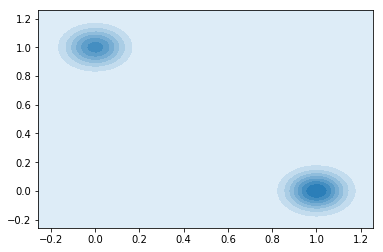

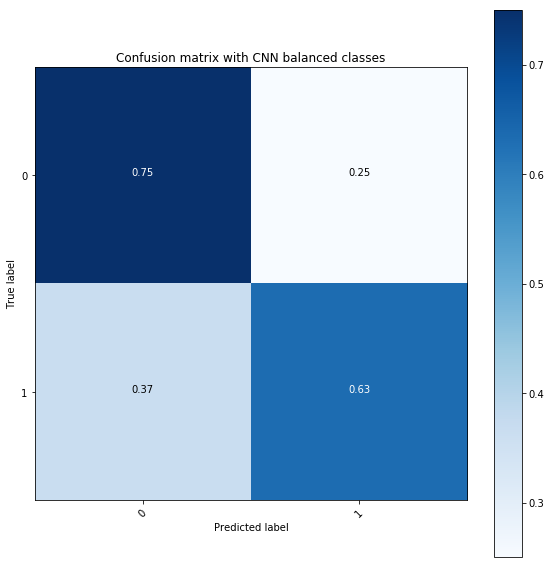

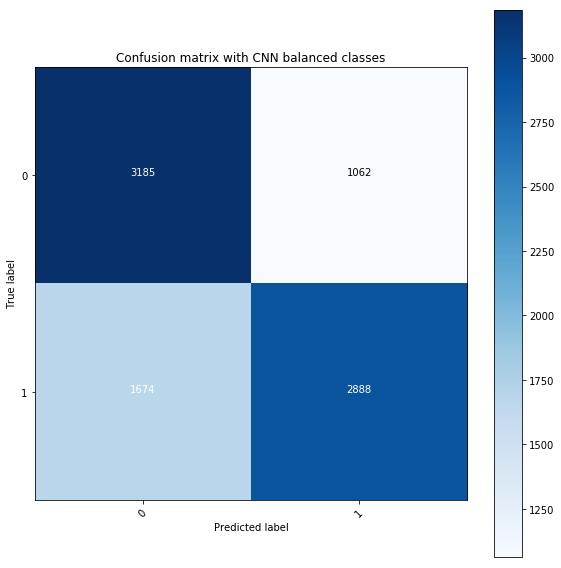

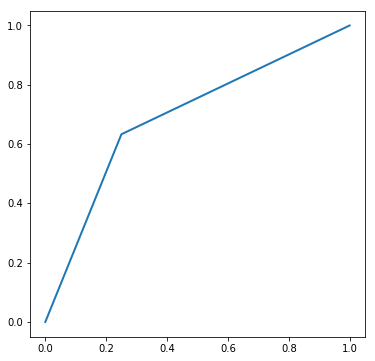

In [81]:
import numpy as np
import keras

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

X_valid = valid_generator.X
y_valid = valid_generator.y
y_valid =y_valid.astype(int)

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)


import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

In [56]:
import numpy as np
import keras

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

X_valid = valid_generator.X
y_valid = valid_generator.y
y_valid =y_valid.astype(int)

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)


88/88 [==============================] - 1s 8ms/step


[0, 1]

Confusion matrix for all classes : 

[[45 16]
 [11 16]]

Normalized confusion matrix
[[0.73770492 0.26229508]
 [0.40740741 0.59259259]]
Confusion matrix, without normalization
[[45 16]
 [11 16]]

TP rate = [0.         0.59259259 1.        ]
FP rate = [0.         0.26229508 1.        ]


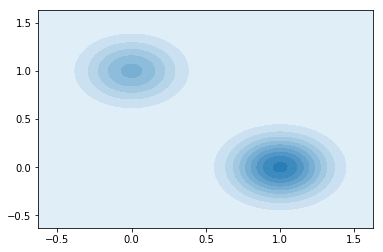

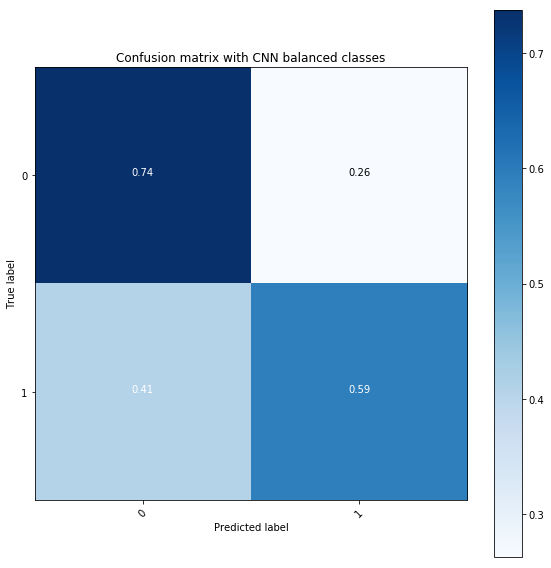

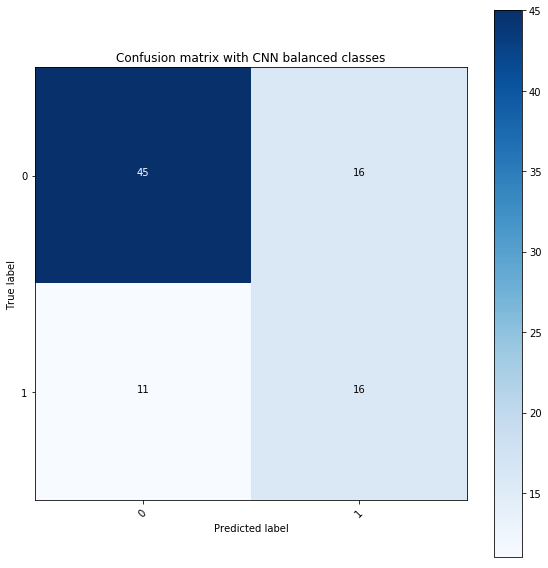

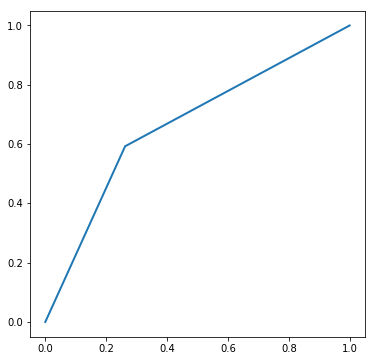

In [57]:
import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

In [59]:
batch_start = 105
#self = train_generator
#for batch_index in range(batch_start, len(train_generator)):
y_valid = train_generator._get_y(batch_start=batch_start)
print(y_valid.shape)
X_valid = train_generator._get_X(batch_start=batch_start)
print(X_valid.shape)

(118, 2)
(118, 40, 166)


In [63]:
import p9_util
p9_util.count_multi_label(y_valid)

{0: 58, 1: 60}

In [60]:
import numpy as np
import keras

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

#X_valid = valid_generator.X
#y_valid = valid_generator.y
y_valid =y_valid.astype(int)

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)


118/118 [==============================] - 1s 6ms/step


[0, 1]

Confusion matrix for all classes : 

[[58  0]
 [ 0 60]]

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Confusion matrix, without normalization
[[58  0]
 [ 0 60]]

TP rate = [0. 1. 1.]
FP rate = [0. 0. 1.]


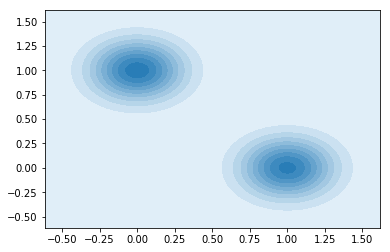

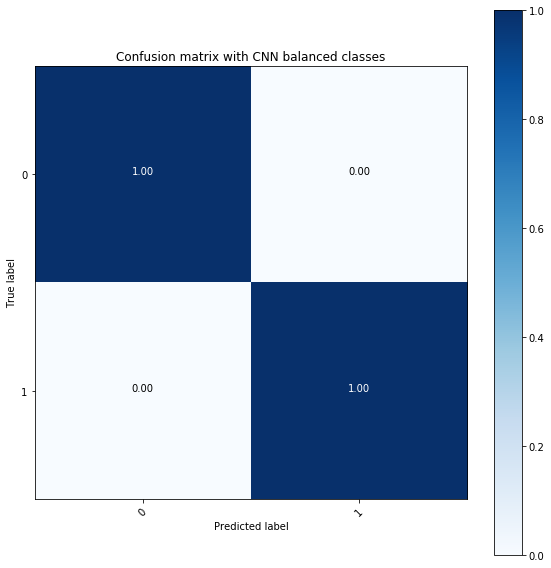

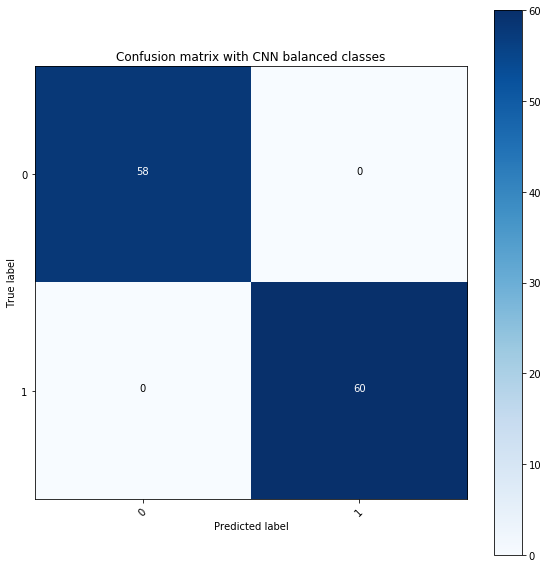

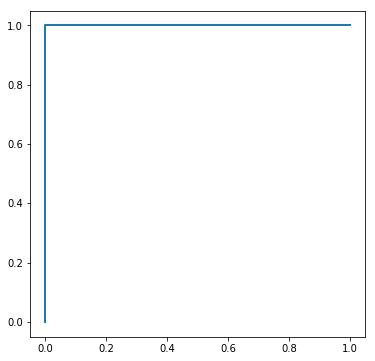

In [61]:
import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

In [11]:
import numpy as np
import keras

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

X_valid = valid_generator.X
y_valid = valid_generator.y
y_valid =y_valid.astype(int)

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)


88/88 [==============================] - 1s 6ms/step


[0, 1]

Confusion matrix for all classes : 

[[45 16]
 [11 16]]

Normalized confusion matrix
[[0.73770492 0.26229508]
 [0.40740741 0.59259259]]
Confusion matrix, without normalization
[[45 16]
 [11 16]]

TP rate = [0.         0.59259259 1.        ]
FP rate = [0.         0.26229508 1.        ]


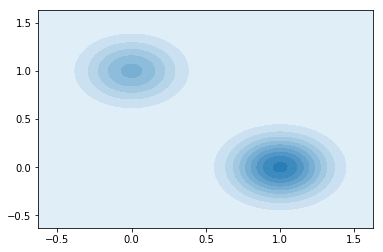

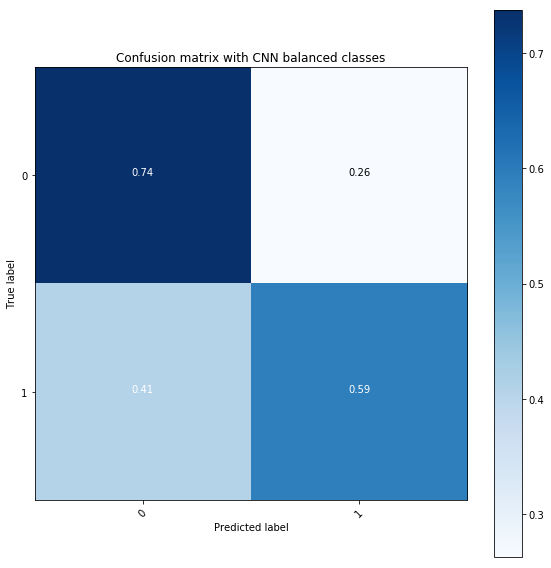

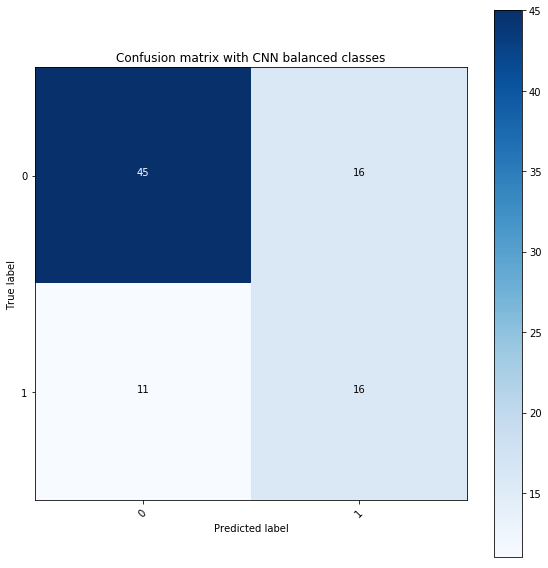

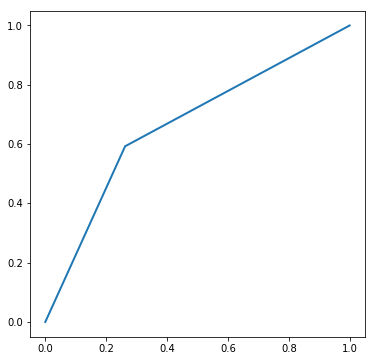

In [12]:
import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

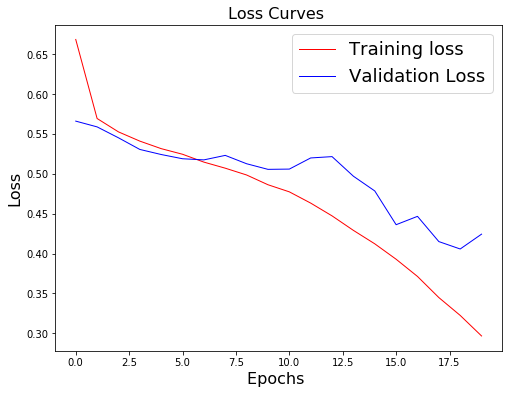

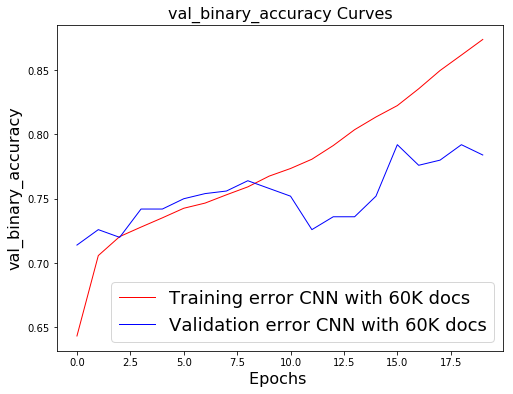

In [2]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN with 60K docs"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=keras_history, legend=legend)

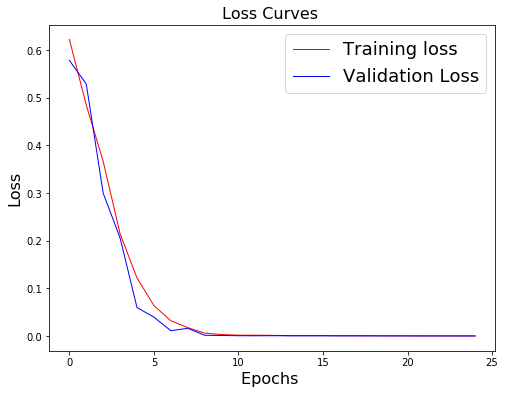

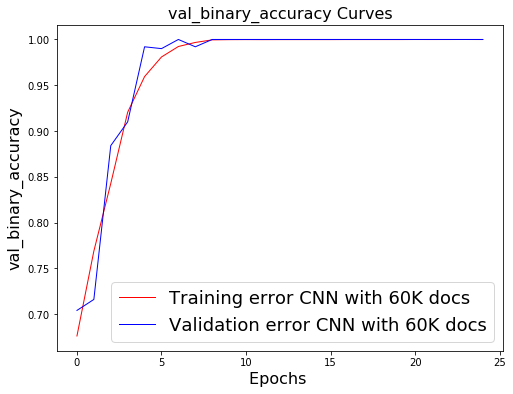

In [4]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN with 60K docs"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=keras_history, legend=legend)

In [4]:
import numpy as np
import keras

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.3_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

X_valid = valid_generator.X
y_valid = valid_generator.y
y_valid =y_valid.astype(int)

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)


W1002 15:24:54.117259 140043199981376 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1002 15:24:54.123863 140043199981376 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1002 15:24:54.193842 140043199981376 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1002 15:24:54.456350 140043199981376 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Pl

88/88 [==============================] - 4s 43ms/step


In [ ]:
import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

/home/bangui/.local/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packa

[0, 1]

Confusion matrix for all classes : 

[[55  6]
 [16 11]]

Normalized confusion matrix
[[0.90163934 0.09836066]
 [0.59259259 0.40740741]]
Confusion matrix, without normalization
[[55  6]
 [16 11]]

TP rate = [0.         0.40740741 1.        ]
FP rate = [0.         0.09836066 1.        ]


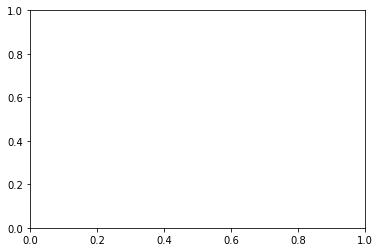

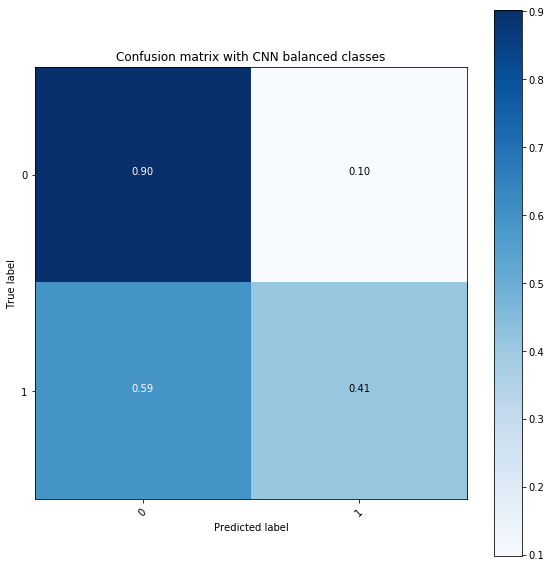

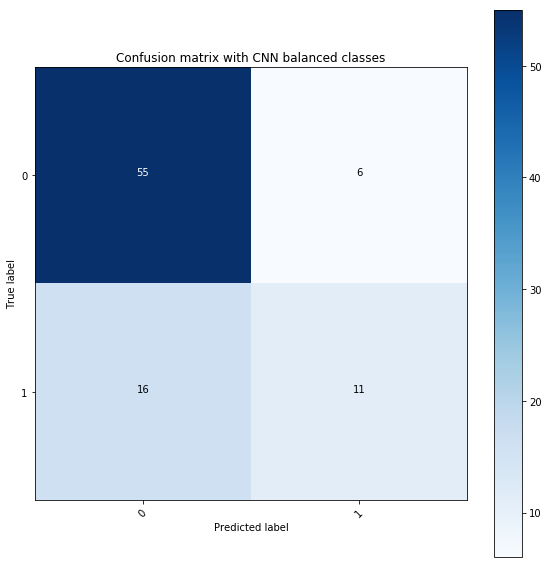

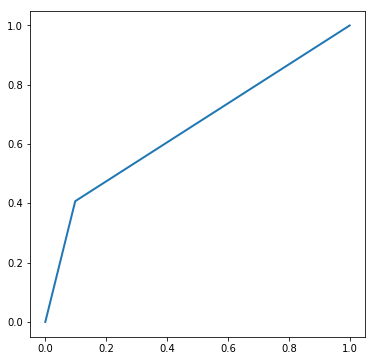

In [5]:
import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

/home/bangui/.local/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[0, 1]

Confusion matrix for all classes : 

[[48 13]
 [13 14]]

Normalized confusion matrix
[[0.78688525 0.21311475]
 [0.48148148 0.51851852]]
Confusion matrix, without normalization
[[48 13]
 [13 14]]

TP rate = [0.         0.51851852 1.        ]
FP rate = [0.         0.21311475 1.        ]


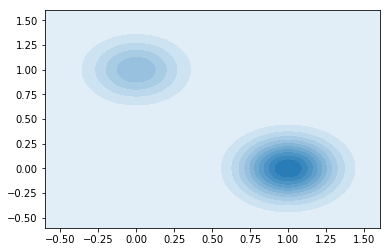

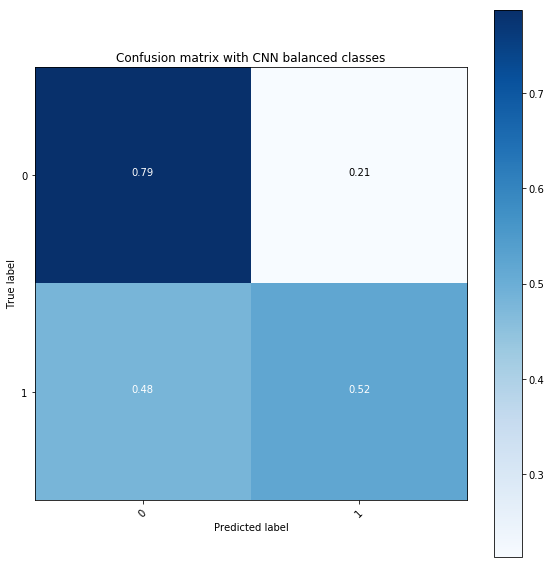

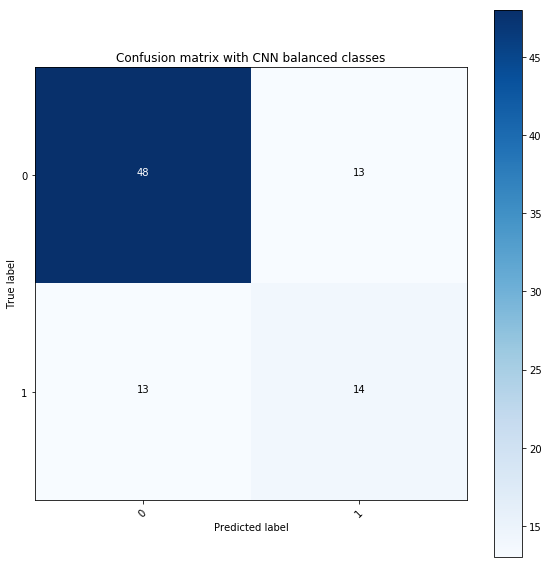

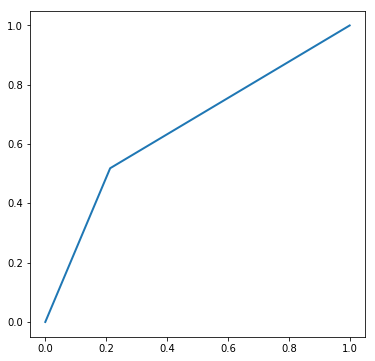

In [25]:
import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

[0, 1]

Confusion matrix for all classes : 

[[3995 1946]
 [ 825 1851]]

Normalized confusion matrix
[[0.67244572 0.32755428]
 [0.30829596 0.69170404]]
Confusion matrix, without normalization
[[3995 1946]
 [ 825 1851]]

TP rate = [0.         0.69170404 1.        ]
FP rate = [0.         0.32755428 1.        ]


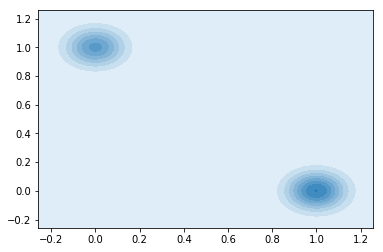

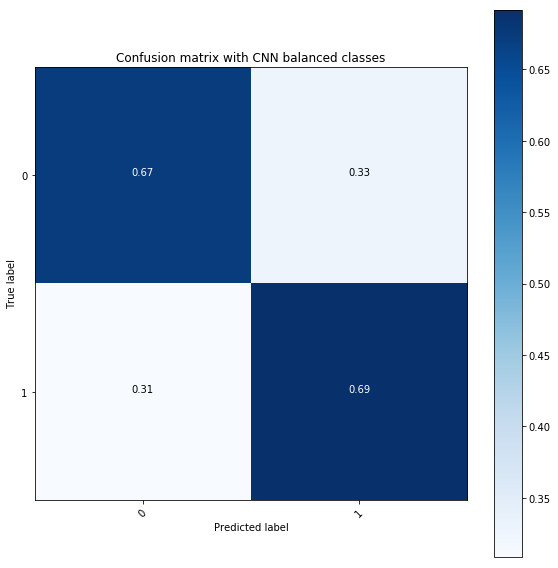

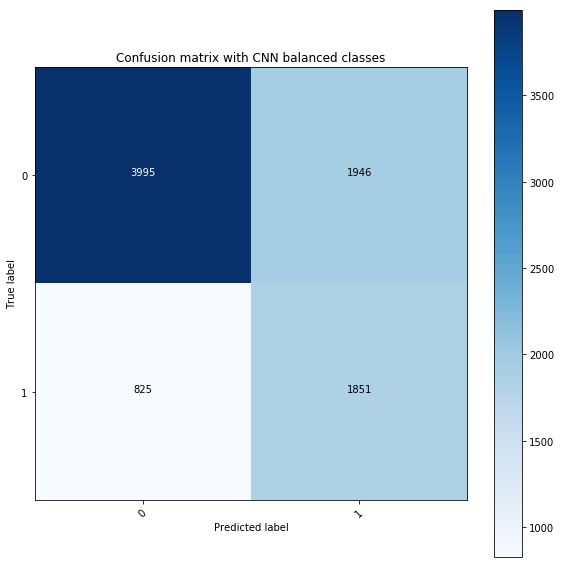

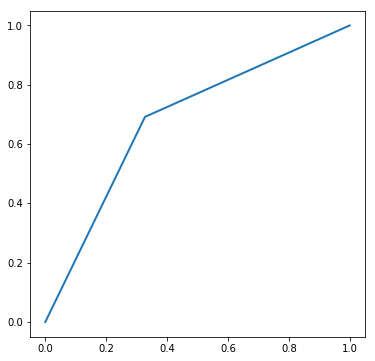

In [20]:
import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN balanced classes")

[0, 1]

Confusion matrix for all classes : 

[[3646 2295]
 [ 922 1754]]

Normalized confusion matrix
[[0.6137014 0.3862986]
 [0.3445441 0.6554559]]
Confusion matrix, without normalization
[[3646 2295]
 [ 922 1754]]

TP rate = [0.        0.6554559 1.       ]
FP rate = [0.        0.3862986 1.       ]


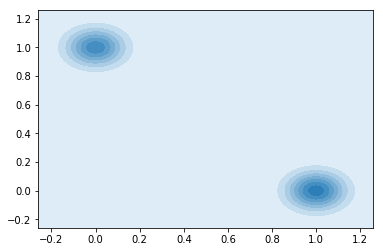

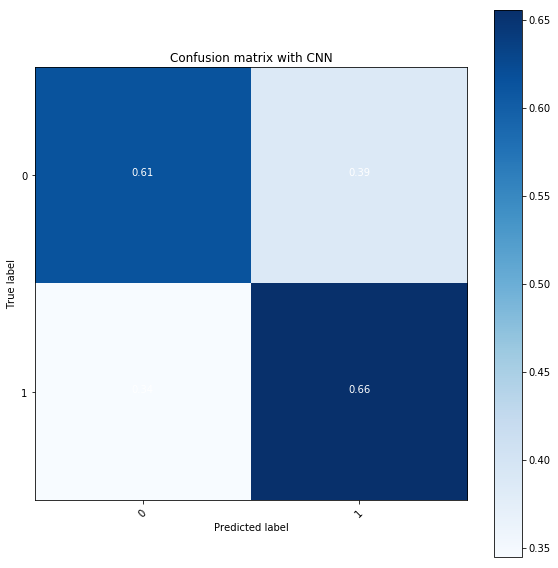

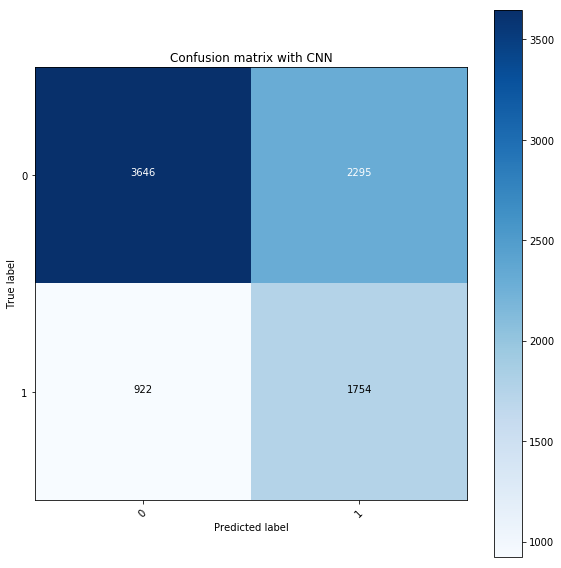

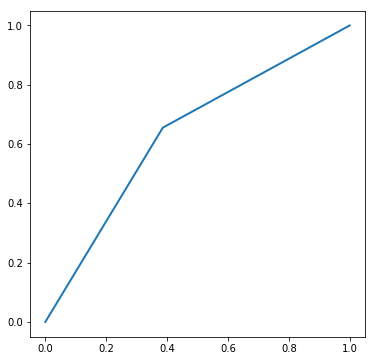

In [148]:
import p9_util


y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN")

In [1]:
import p5_util
import p9_util_keras
import p9_util_config

filename = "./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_17.dill"
ddict_history_kfold_ = p5_util.object_load(filename)

dict_param_keras_cnn = p9_util_config.dict_param_keras_cnn

epochs = dict_param_keras_cnn['dict_param_keras']['nb_epoch']
df_history_score = p9_util_keras.build_df_history_score_from_kfold(ddict_history_kfold_, epochs)

keras_history = p9_util_keras.build_keras_history_from_df_score(df_history_score)

/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.
W0930 23:48:07.851380 140444887603008 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0930 23:48:07.853528 140444887603008 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0930 23:4

p5_util.object_load : fileName= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_17.dill


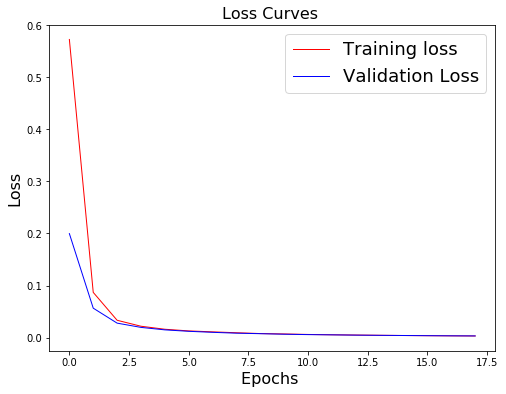

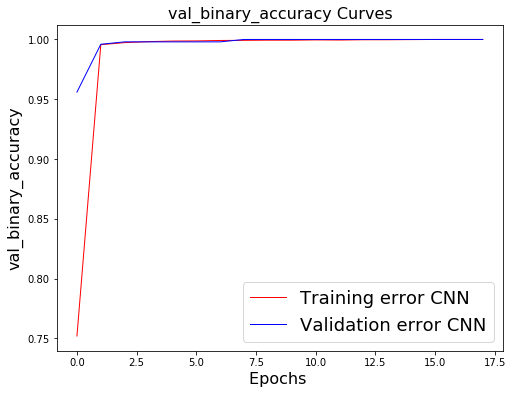

In [2]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=keras_history, legend=legend)

In [235]:
X_valid = valid_generator.X
y_valid = valid_generator.y
y_valid =y_valid.astype(int)

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)


8617/8617 [==============================] - 7s 776us/step


In [247]:
y_predict_round[:10]

array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0]])

[0, 1]

Confusion matrix for all classes : 

[[3946 1995]
 [ 912 1764]]

Normalized confusion matrix
[[0.66419795 0.33580205]
 [0.34080717 0.65919283]]
Confusion matrix, without normalization
[[3946 1995]
 [ 912 1764]]

TP rate = [0.         0.65919283 1.        ]
FP rate = [0.         0.33580205 1.        ]


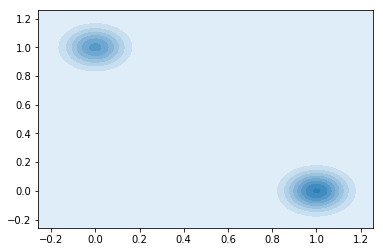

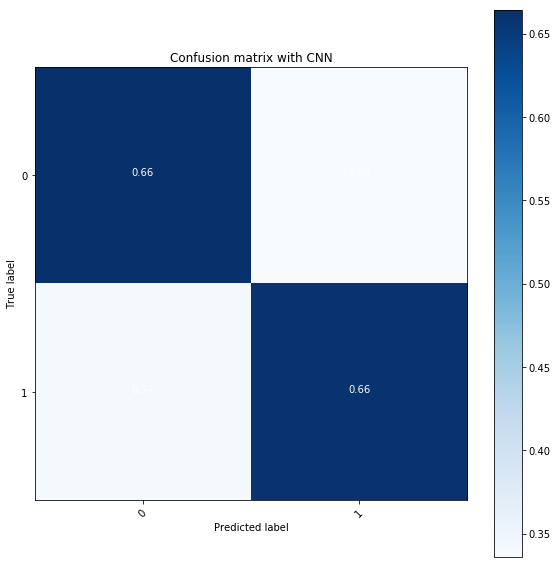

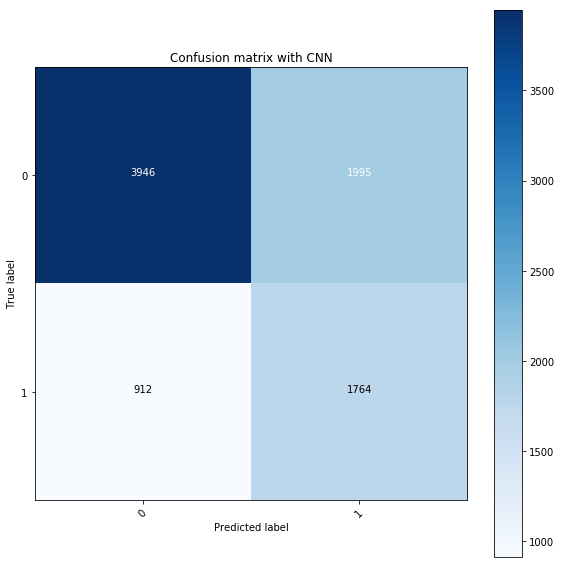

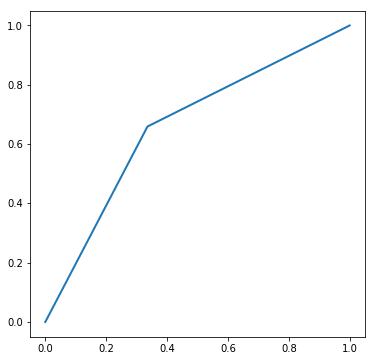

In [236]:
import numpy as np
import keras
import p9_util

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN")

# <font color=blus> 5.0 Using model issued from submission</font>

In [1]:
%matplotlib inline


%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')


In [3]:
import p5_util

filename = './data/dict_param_sequence_train_60000.dump'
dict_param_sequence = p5_util.object_load(filename)
dict_param_sequence

p5_util.object_load : fileName= ./data/dict_param_sequence_train_60000.dump


{'step': 1,
 'step_end': 2,
 'previous_step_file_name': './data/DataPreparator_v2_40Tokens_spacy__en_core_web_lg__train_60000_step1.dill',
 'dict_param_step': {1: {'dataset_filename': './data/X_y_balanced',
   'dict_param_dataprep': {'other': None,
    'slice_length': 10000,
    'min_token_len': 2,
    'max_token_len': -1,
    'min_doc_len': 1,
    'max_doc_len': -1,
    'spacy_model_language': 'en_core_web_lg',
    'tokenizer': None,
    'max_padding_length': 105,
    'oov_keyword': None,
    'entity_keyword': None,
    'nb_word_most_frequent': 0,
    'is_df_copied': False,
    'is_tfidf': False}},
  2: {'dataprep_step_filename': None,
   'dict_param_dataprep': {'other': None,
    'slice_length': 10000,
    'min_token_len': 2,
    'max_token_len': -1,
    'min_doc_len': 1,
    'max_doc_len': -1,
    'spacy_model_language': 'en_core_web_lg',
    'tokenizer': None,
    'max_padding_length': 105,
    'oov_keyword': None,
    'entity_keyword': None,
    'nb_word_most_frequent': 0,
    'is

## <font color=blus> 5.1 Load DataPreparator to get number of records</font>

In [5]:
import p5_util

filename_train = './data/train_generator.dill'
filename_valid = './data/valid_generator.dill'
if True :
    train_generator = p5_util.object_load(filename_train)
    valid_generator = p5_util.object_load(filename_valid)
else :
    p5_util.object_dump(train_generator, filename_train, is_verbose=True)
    p5_util.object_dump(valid_generator, filename_valid, is_verbose=True)
    

p5_util.object_load : fileName= ./data/train_generator.dill
p5_util.object_load : fileName= ./data/valid_generator.dill


In [6]:
train_generator.get_params()

{'keras_input_dim': (100, 300),
 'batch_size': 1000,
 'n_classes': 2,
 'n_channels': 0,
 'is_shuffle': False,
 'keras_nb_channel': 1,
 'list_keras_channel': [],
 'data_type': 'train',
 'proj_dimension': None,
 'is_dimension_mux': False,
 'binary_threshold': 0.5}

## <font color=blus> 5.2 Update of generic paramaters for CNN build that depends on DataGenerator </font>

In [7]:
import p9_util_config

#---------------------------------------------------------------
# Update of generic paramaters depending of DataGenerator 
#---------------------------------------------------------------
dict_param_keras_cnn = p9_util_config.dict_param_keras_cnn.copy()
if False :
    dict_param_keras_cnn['nb_dense_neuron'] = 8
    dict_param_keras_cnn['dense_layer'] = 2

    dict_param_keras_cnn['conv_layer'] = 1

dict_param_keras = dict_param_keras_cnn['dict_param_keras'].copy()
dict_param_keras['input_dim']          = train_generator.get_params()['keras_input_dim']
dict_param_keras['batch_size']         = train_generator.get_params()['batch_size']
dict_param_keras['nbClasses']         = train_generator.get_params()['n_classes']
#dict_param_keras['dropout_rate']      = 0.
dict_param_keras['lr'] = 1.e-4

dict_param_keras_cnn['dict_param_keras'] = dict_param_keras.copy()
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (100, 300),
  'batch_size': 1000,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.3,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 0.0001,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [8]:
import p9_util_benchmark

dict_param_benchmark = p9_util_benchmark.dict_param_benchmark.copy()
#dict_param_benchmark['n_sample'] = 100000
dict_param_benchmark['threshold'] = 0.0
dict_param_benchmark['n_sample'] = dict_param_sequence['n_sample_valid']
dict_param_benchmark['n_sample_train'] = dict_param_sequence['n_sample_train']
dict_param_benchmark['epochs'] = dict_param_keras_cnn['dict_param_keras']['nb_epoch']
dict_param_benchmark['n_sample']=12000
dict_param_benchmark['n_sample_train']=129651
dict_param_benchmark['threshold']=train_generator.get_params()['binary_threshold']
dict_param_benchmark

{'root_directory': './data/benchmark/',
 'format_file': '.dill',
 'format_model': '.h5',
 'root_filename_benchmark': './data/benchmark/df_sample_benchmark_',
 'root_filename_model': 'model_jigsaw_',
 'n_sample': 12000,
 'n_sample_train': 129651,
 'is_dataset_reloaded': True,
 'model_type': 'submission',
 'is_model_reloaded': True,
 'threshold': 0.5,
 'embeddings_dimension': 300,
 'val_score_max': True,
 'epochs': 10}

## <font color=blus> 5.3 Save paramaters for building CNN </font>

In [10]:
import p5_util
import p9_util_benchmark

filename_param = p9_util_benchmark.build_filename_param(dict_param_benchmark=dict_param_benchmark)
p5_util.object_dump(dict_param_benchmark, filename_param, is_verbose=True)

object_dump: file name= ./data/benchmark/dict_param_submission__model_jigsaw_submission_sample129651_threshold0.5.dill


## <font color=blus> 5.4 Build embedding matrix for embedding layer</blus>

In [14]:
X, y = train_generator[0]
X.shape, y.shape

((500, 100, 300), (500, 2))

In [6]:
import numpy as np
X = np.load('./data/train_X_0.npy')

In [12]:
train_generator.keras_input_dim

(100, 300)

## <font color=blus> 5.5 Build CNN model using parameters</font>

In [11]:
import p9_util_benchmark

model, list_callback = p9_util_benchmark.build_model(dict_param_benchmark, dict_param_keras_cnn)

W1024 15:22:11.815865 140076408768320 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1024 15:22:11.817818 140076408768320 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1024 15:22:11.890494 140076408768320 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1024 15:22:11.908835 140076408768320 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138:

<class 'tensorflow.python.framework.ops.Tensor'>


W1024 15:22:12.323319 140076408768320 deprecation.py:506] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1024 15:22:12.405208 140076408768320 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1024 15:22:12.409019 140076408768320 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1024 15:22:12.412388 140076408768320 deprecation.py:323] From /home/bangui/anaconda3/envs/python

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 300)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 300)          1200      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 256)          153856    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 256)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 256)           1024      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 256)           196864    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 256)            0         
__________

## <font color=blus> 5.6 Train CNN model</blus>

In [14]:
dict_param_keras_cnn['dict_param_keras']['nb_epoch']=20
dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (100, 300),
  'batch_size': 1000,
  'nb_epoch': 20,
  'verbose': 1,
  'dropout_rate': 0.3,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 0.0001,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [15]:
import p9_util_benchmark

model, history = p9_util_benchmark.train_model(train_generator, valid_generator, model,dict_param_keras_cnn, \
list_callback=list_callback)


Training model...
Epoch 1/20
130/130 [==============================] - 491s 4s/step - loss: 0.5865 - acc: 0.7183 - val_loss: 0.4871 - val_acc: 0.7809

Epoch 00001: val_acc improved from -inf to 0.78092, saving model to ./data/benchmark/model_jigsaw_submission_sample129651_threshold0.5_best.h5
Epoch 2/20
130/130 [==============================] - 411s 3s/step - loss: 0.4238 - acc: 0.8125 - val_loss: 0.3986 - val_acc: 0.8266

Epoch 00002: val_acc improved from 0.78092 to 0.82658, saving model to ./data/benchmark/model_jigsaw_submission_sample129651_threshold0.5_best.h5
Epoch 3/20
130/130 [==============================] - 427s 3s/step - loss: 0.3721 - acc: 0.8393 - val_loss: 0.4188 - val_acc: 0.8233

Epoch 00003: val_acc did not improve from 0.82658
Epoch 4/20
130/130 [==============================] - 426s 3s/step - loss: 0.3424 - acc: 0.8542 - val_loss: 0.3522 - val_acc: 0.8530

Epoch 00004: val_acc improved from 0.82658 to 0.85300, saving model to ./data/benchmark/model_jigsaw_submi

In [16]:
import p5_util
import p9_util_benchmark

filename_history = p9_util_benchmark.build_filename_history(dict_param_benchmark)
filename_history
p5_util.object_dump(history,filename_history, is_verbose=True)

object_dump: file name= ./data/benchmark/history_submission_300D_129651_.dill


## <font color=blus> 5.7 Validation</font>

### <font color=blus> 5.7.1 Reload parameters</font>

In [13]:
import p5_util
filename = './data/benchmark/dict_param_submission__model_jigsaw_submission_sample60000_threshold0.0.dill'
dict_param = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/benchmark/dict_param_submission__model_jigsaw_submission_sample60000_threshold0.0.dill


### <font color=blus> 5.7.2 Reload CNN model from parameters</font>

In [17]:
import p9_util_benchmark

filename_model = p9_util_benchmark.build_filename_model(dict_param_benchmark = dict_param)
filename_model

'./data/benchmark/model_jigsaw_submission_sample60000_threshold0.0_best.h5'

In [23]:
import p9_util_keras
model = p9_util_keras.load_model(filename_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 105, 300)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 105, 300)          1200      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 105, 256)          153856    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 21, 256)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 256)           1024      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 256)           196864    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 256)            0         
__________

### <font color=blus> 5.7.3 Display results </font>

In [12]:
import numpy as np

X_valid = valid_generator.X
y_valid = valid_generator.y
y_valid =y_valid.astype(int)

In [13]:
import numpy as np

y_predict = model.predict(X_valid, verbose=1)
y_predict_round = np.round(y_predict).astype(int)

12000/12000 [==============================] - 15s 1ms/step


[0, 1]

Confusion matrix for all classes : 

[[5267  925]
 [ 755 5053]]

Normalized confusion matrix
[[0.8506137  0.1493863 ]
 [0.12999311 0.87000689]]
Confusion matrix, without normalization
[[5267  925]
 [ 755 5053]]

TP rate = [0.         0.87000689 1.        ]
FP rate = [0.        0.1493863 1.       ]
AUC = 0.8603102910713905


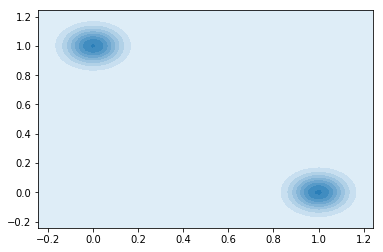

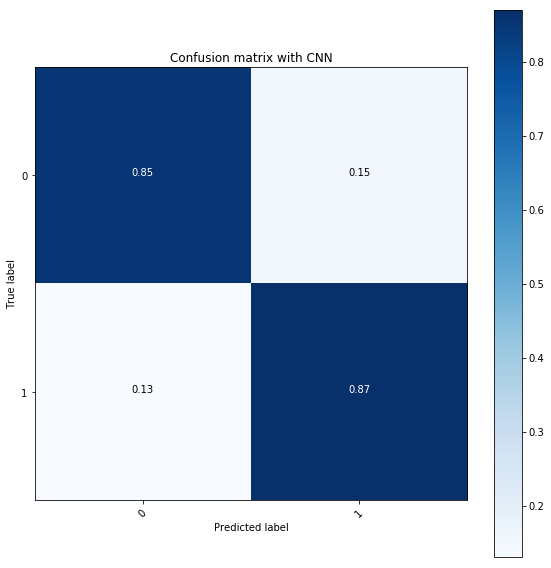

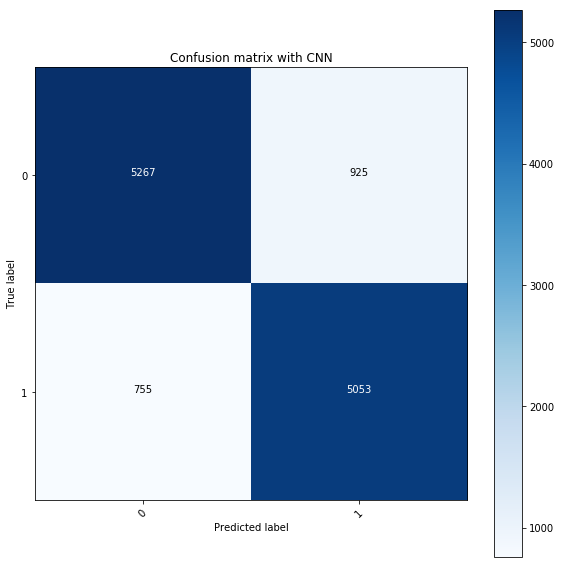

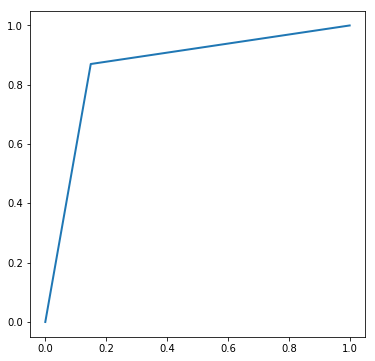

In [16]:
import p9_util

y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict_round, \
                                      title="Confusion matrix with CNN")

### <font color=blus> 5.7.4 Display loss and accuracy </font>

In [3]:
import p5_util
filename = "./data/benchmark/dict_param_submission__model_jigsaw_submission_sample129651_threshold0.5.dill"
dict_param = p5_util.object_load(filename)
dict_param

p5_util.object_load : fileName= ./data/benchmark/dict_param_submission__model_jigsaw_submission_sample129651_threshold0.5.dill


{'root_directory': './data/benchmark/',
 'format_file': '.dill',
 'format_model': '.h5',
 'root_filename_benchmark': './data/benchmark/df_sample_benchmark_',
 'root_filename_model': 'model_jigsaw_',
 'n_sample': 12000,
 'n_sample_train': 129651,
 'is_dataset_reloaded': True,
 'model_type': 'submission',
 'is_model_reloaded': True,
 'threshold': 0.5,
 'embeddings_dimension': 300,
 'val_score_max': True,
 'epochs': 10}

In [10]:
import p5_util
import p9_util_benchmark

filename_history = p9_util_benchmark.build_filename_history(dict_param_benchmark = dict_param)
print(filename_history)
#filename_history="./data/benchmark/history_submission_300D_129651_0.dill"
history = p5_util.object_load(filename_history)

./data/benchmark/history_submission_300D_129651_.dill
p5_util.object_load : fileName= ./data/benchmark/history_submission_300D_129651_.dill


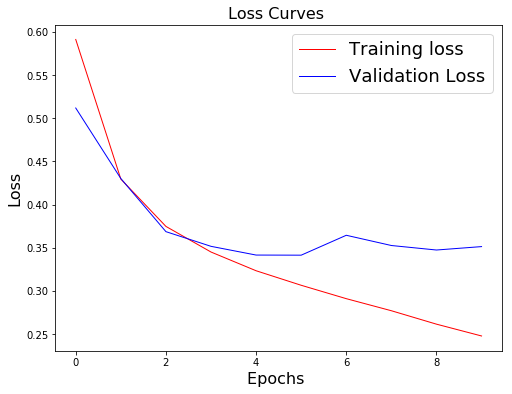

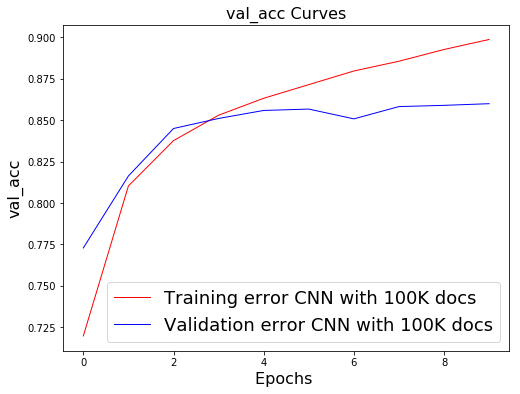

In [11]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN with 100K docs"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)